In [1]:
""" 
5 APRIL 2024 
Célien Vandromme
Testing if the response peak delay and amplitude patterns are different between WT and KO groups
"""

import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import percephone.plts.behavior as pbh
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count, pool
import warnings

plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline
warnings.filterwarnings('ignore')
fontsize = 30

In [2]:
directory = "C:/Users/cvandromme/Desktop/Data/"
roi_info = pd.read_excel("C:/Users/cvandromme/Desktop/FmKO_ROIs&inhibitory.xlsx")
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

In [3]:
def opening_rec(fil,i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, fil, roi_info)
    return rec

In [4]:
workers = cpu_count()
pool = pool.ThreadPool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file,i)) for i,file in enumerate(files_)]
recs = {ar.get().filename: ar.get() for ar in async_results}

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.


In [5]:
for rec in recs.values():
    rec.peak_delay_amp()

# For all stimulation amplitudes
---

## Difference of mean response peak delay and mean response peak amplitude between WT and (KO + KO-Hypo)

Boxplot plotting.
Frames
ShapiroResult(statistic=0.9255049642232683, pvalue=0.4760995626888919)
ShapiroResult(statistic=0.9472035282429825, pvalue=0.717589843083219)
TtestResult(statistic=0.9333917076742358, pvalue=0.3690190776034469, df=12.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9266400063555157, pvalue=0.4860121723704322)
ShapiroResult(statistic=0.7874201521853615, pvalue=0.04515497462776448)
MannwhitneyuResult(statistic=27.0, pvalue=0.7458042532435456)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9143755285578248, pvalue=0.3859070707539719)
ShapiroResult(statistic=0.966433044939126, pvalue=0.8676740949500177)
TtestResult(statistic=-2.2243246833181485, pvalue=0.04607878791453902, df=12.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.8945239932417721, pvalue=0.25767299923544384)
ShapiroResult(statistic=0.935626988456183, pvalue=0.6242004131060567)
TtestResult(statistic=2.557981948148286, pvalue=0.025094523312194313, df=12.0)
Boxplot plotting.
Frames
ShapiroRe

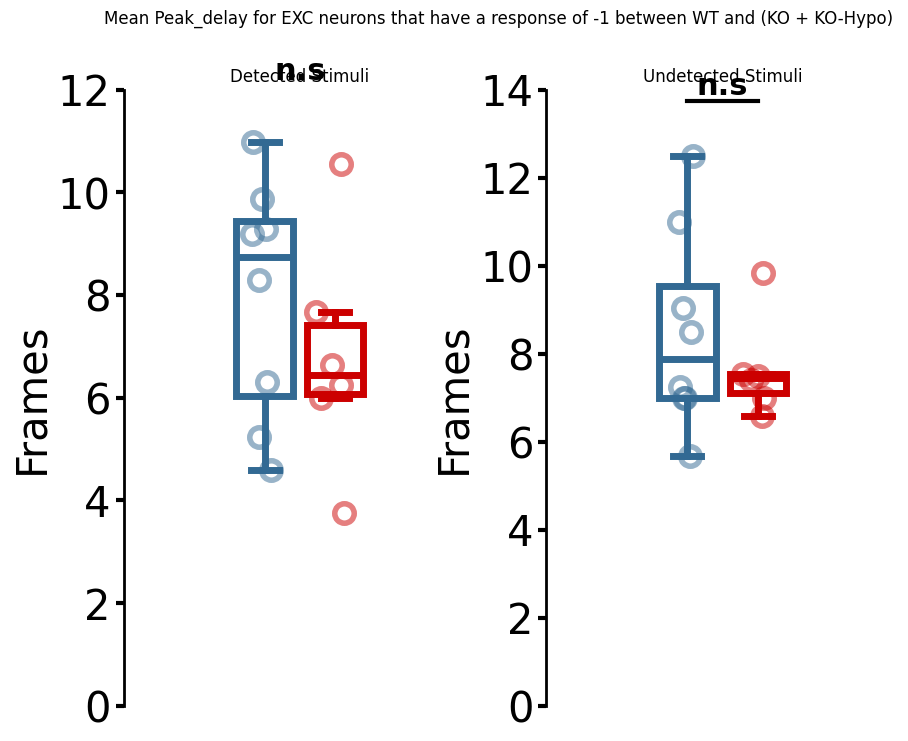

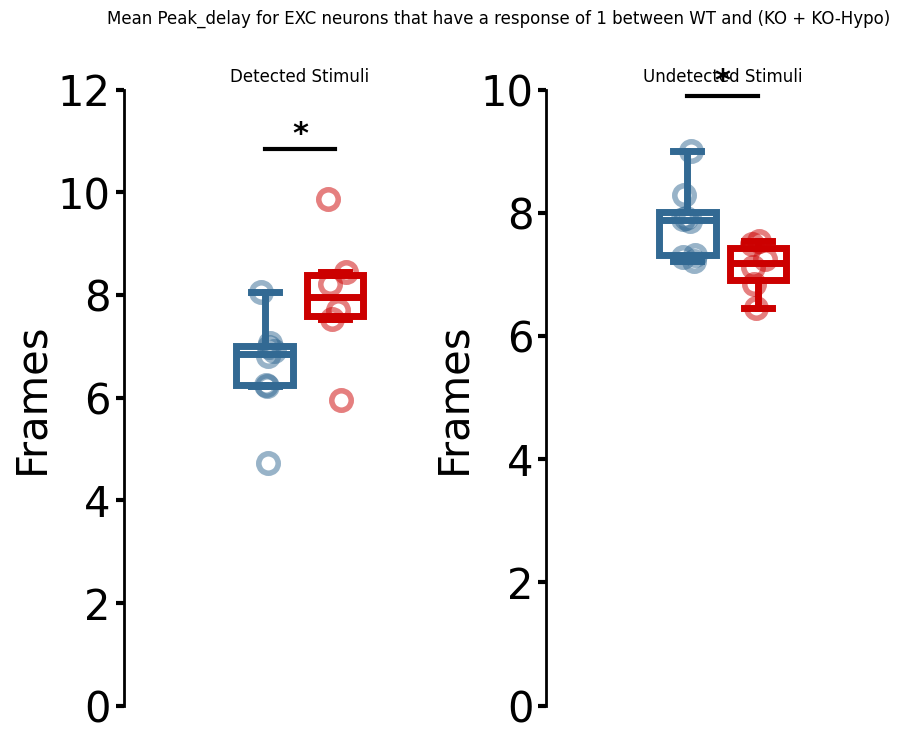

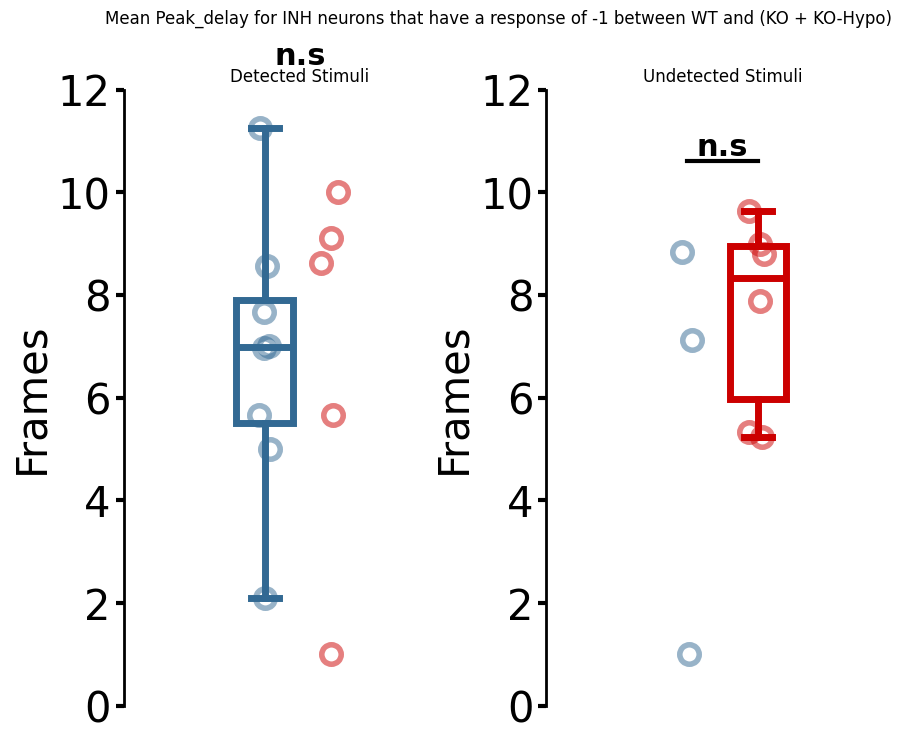

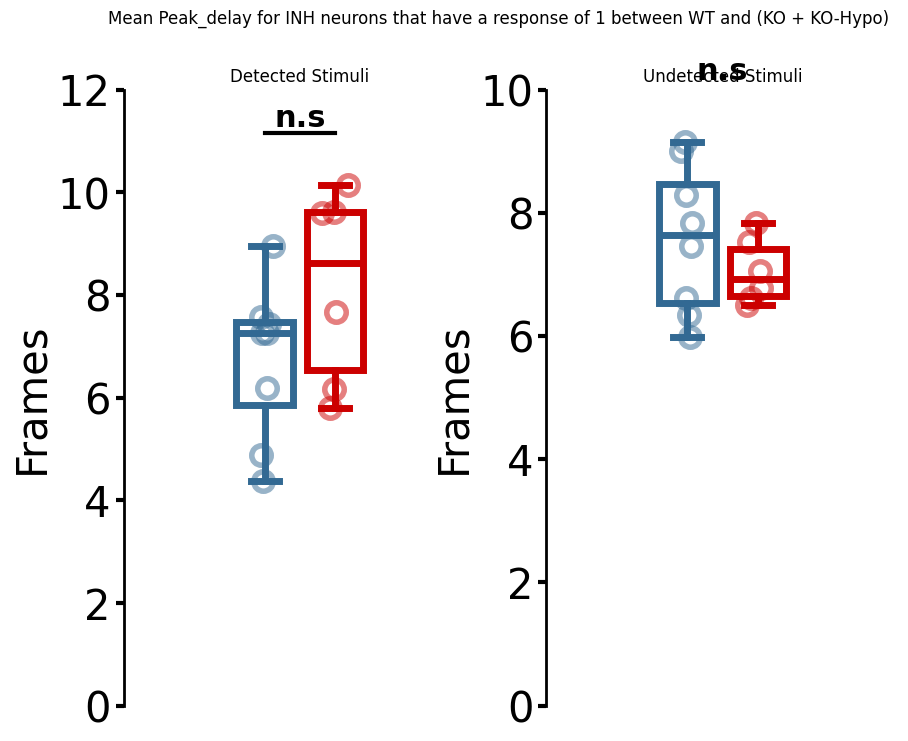

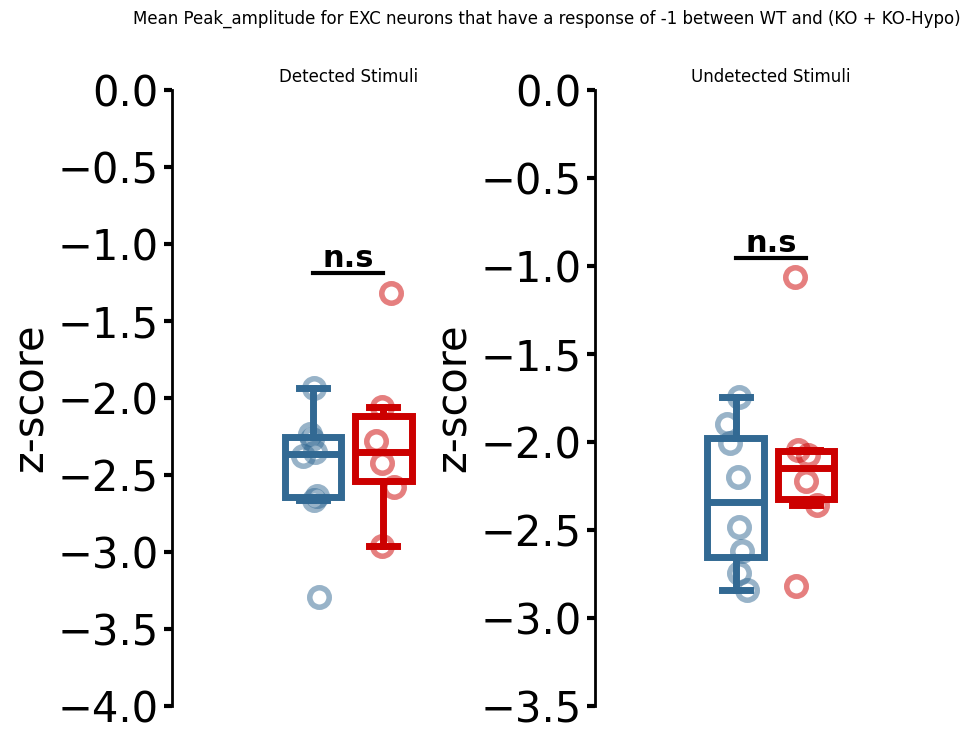

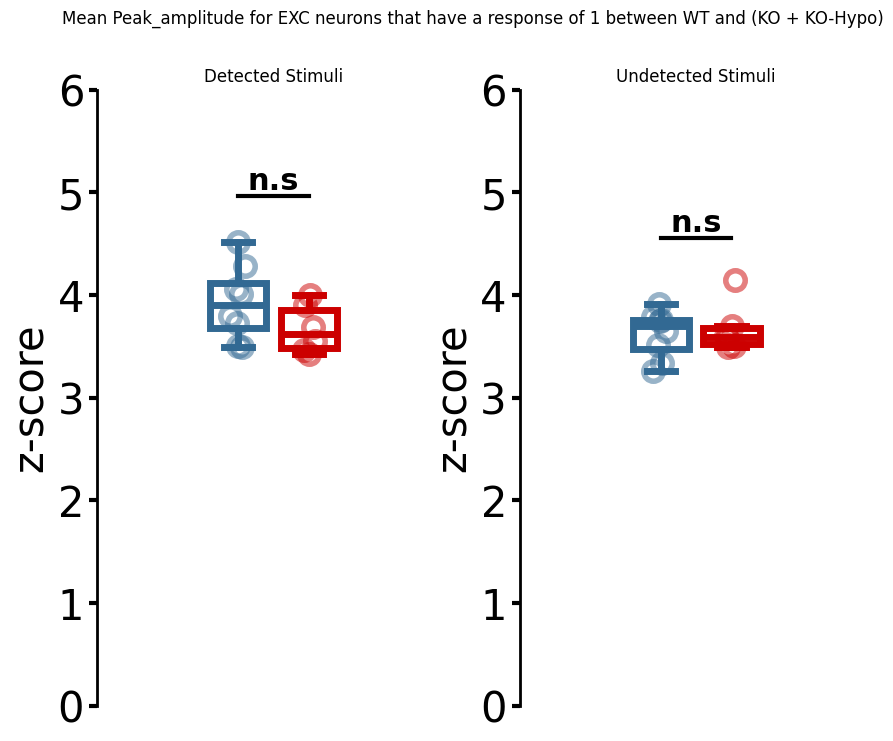

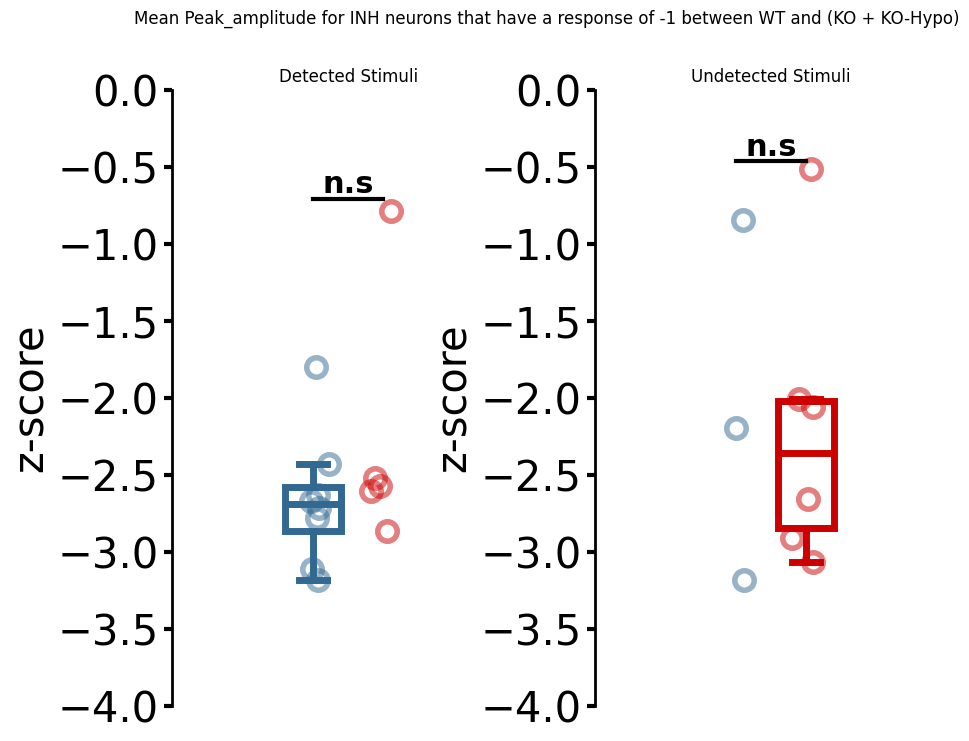

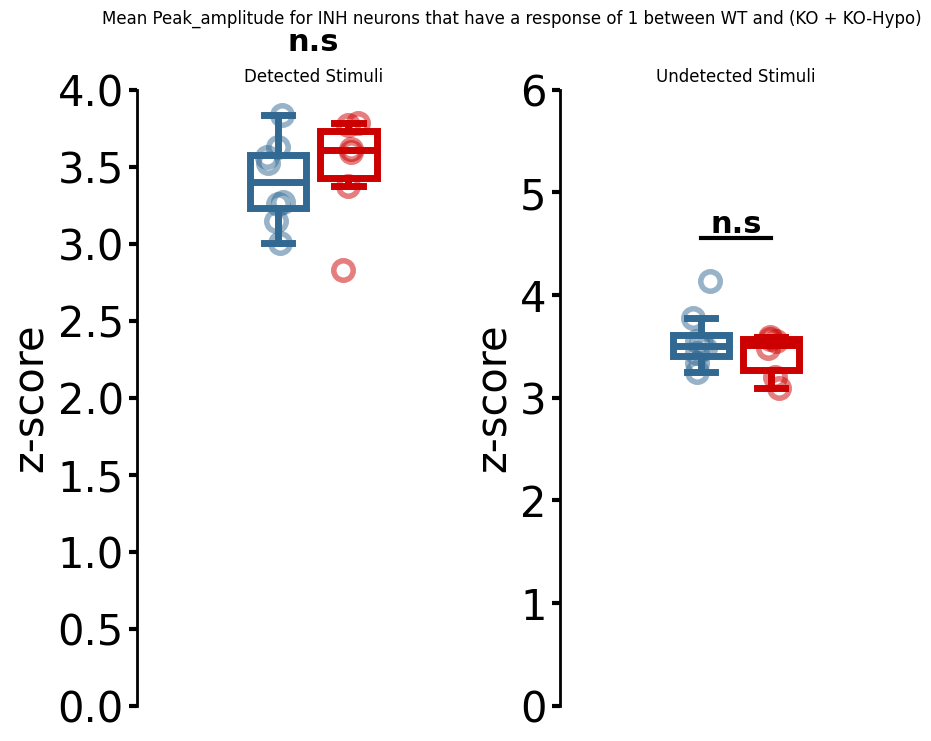

In [36]:
for parameter in ["Peak_delay", "Peak_amplitude"]:
    for neurone_type in ["EXC", "INH"]:
        for response_type in [-1, 1]:
            wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
            for rec in recs.values():
                # For detected stimuli
                resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
                detected = rec.matrices[neurone_type][parameter][:,rec.detected_stim]
                det = np.where(resp_detected == response_type, detected, np.nan)
                
                # For undetected stimuli
                resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
                undetected = rec.matrices[neurone_type][parameter][:,np.invert(rec.detected_stim)]
                undet = np.where(resp_undetected == response_type, undetected, np.nan)
                
                if rec.genotype == "WT":
                    wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                else:
                    ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                    ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                
            scale = "Frames" if parameter == "Peak_delay" else "z-score"
            fig, axs = plt.subplots(1,2,figsize=(10,8))
            ppt.boxplot(axs[0], wt_det,ko_det,scale,ylim=[])
            ppt.boxplot(axs[1], wt_undet,ko_undet,scale,ylim=[])
            axs[0].set_title("Detected Stimuli")
            axs[1].set_title("Undetected Stimuli")
            fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} between WT and (KO + KO-Hypo)")

## Difference of mean response peak delay and mean response peak amplitude between WT and KO-Hypo

Boxplot plotting.
Frames
ShapiroResult(statistic=0.9255049642232683, pvalue=0.4760995626888919)
ShapiroResult(statistic=0.9491257298457669, pvalue=0.7106596826458024)
TtestResult(statistic=1.484648672089442, pvalue=0.1684608654386334, df=10.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9266400063555157, pvalue=0.4860121723704322)
ShapiroResult(statistic=0.681596449185919, pvalue=0.006940711564520902)
MannwhitneyuResult(statistic=14.0, pvalue=0.7985617630048201)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9143755285578248, pvalue=0.3859070707539719)
ShapiroResult(statistic=0.9301406167669393, pvalue=0.5952260280431834)
TtestResult(statistic=-2.6452484249434502, pvalue=0.024512158953262152, df=10.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.8945239932417721, pvalue=0.25767299923544384)
ShapiroResult(statistic=0.9100950528227506, pvalue=0.48290586083762455)
TtestResult(statistic=2.2586562119675113, pvalue=0.04747672617667442, df=10.0)
Boxplot plotting.
Frames
Shapi

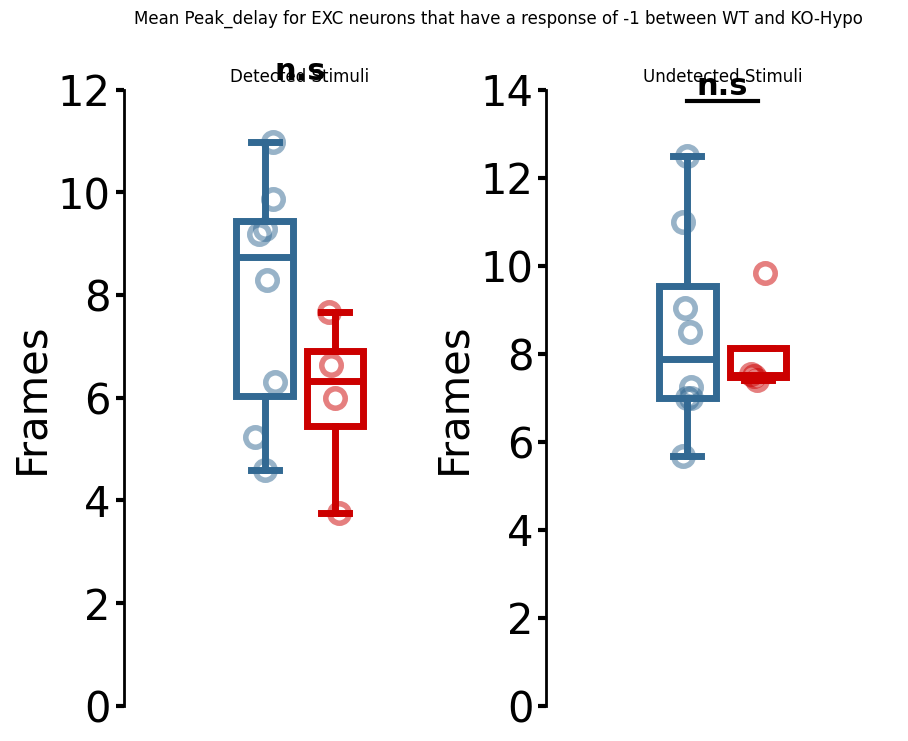

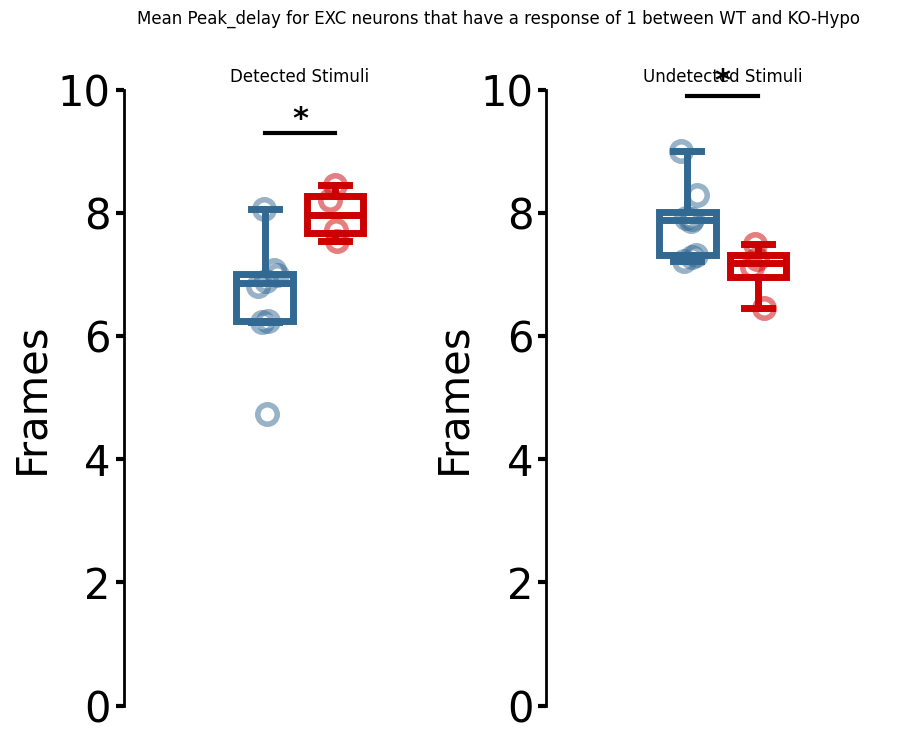

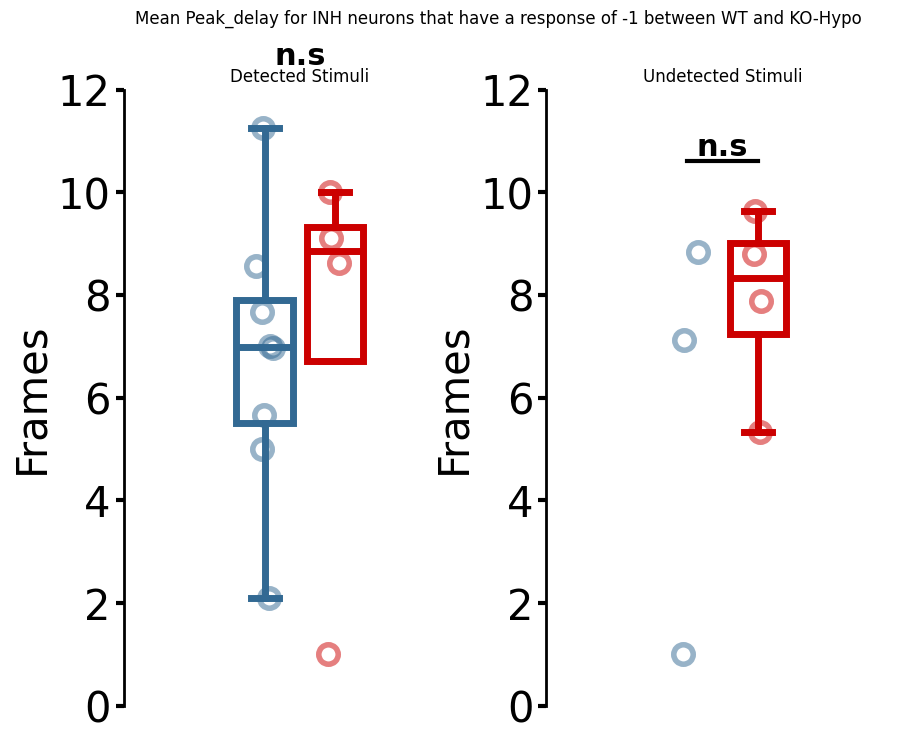

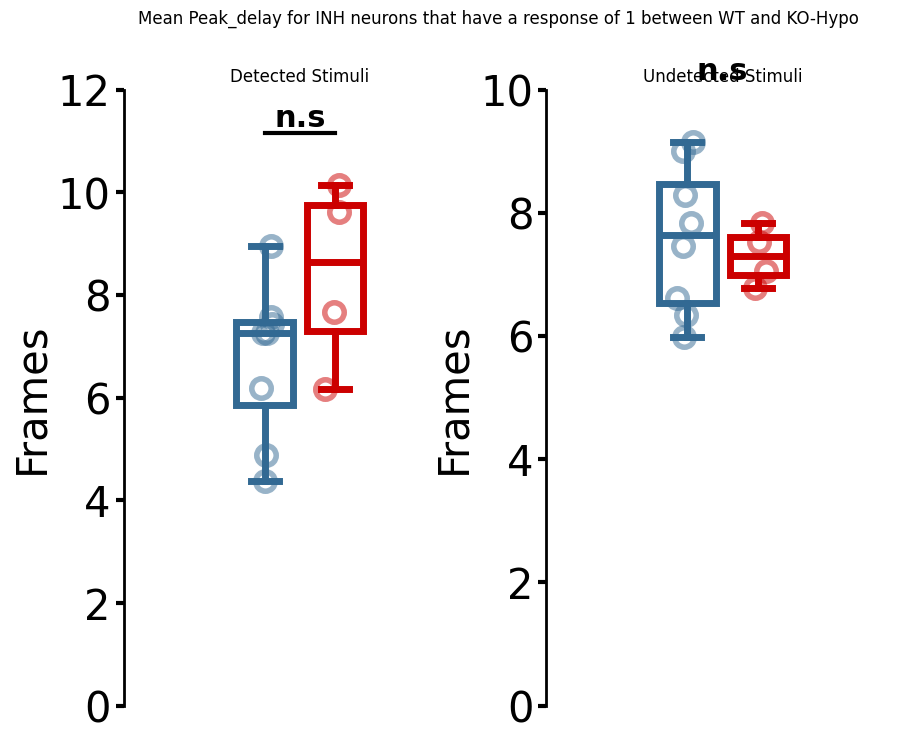

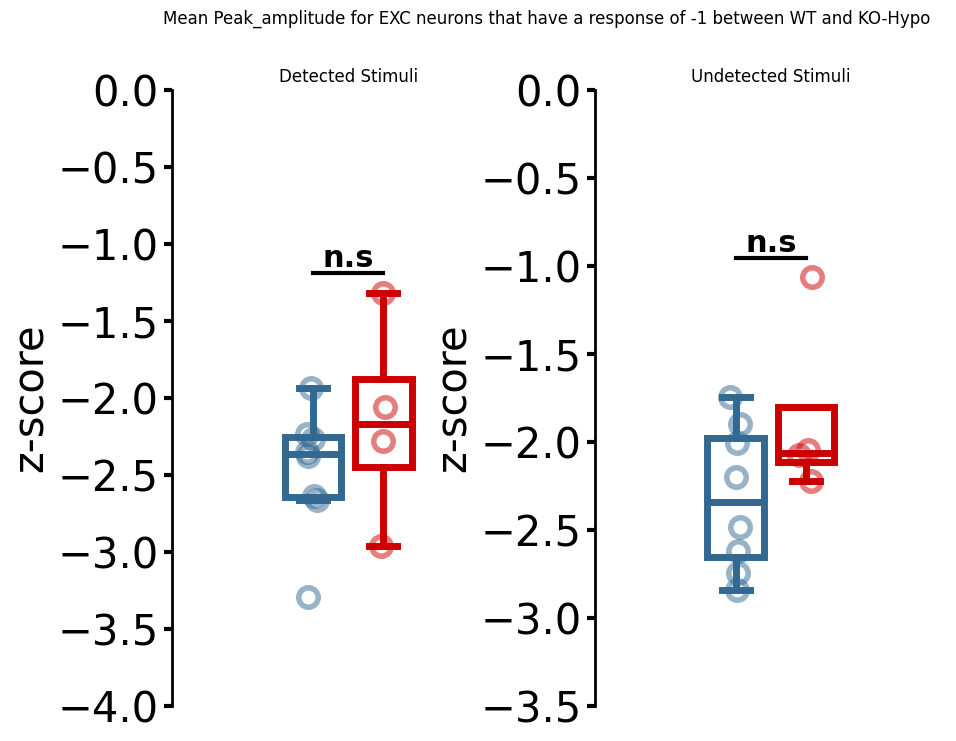

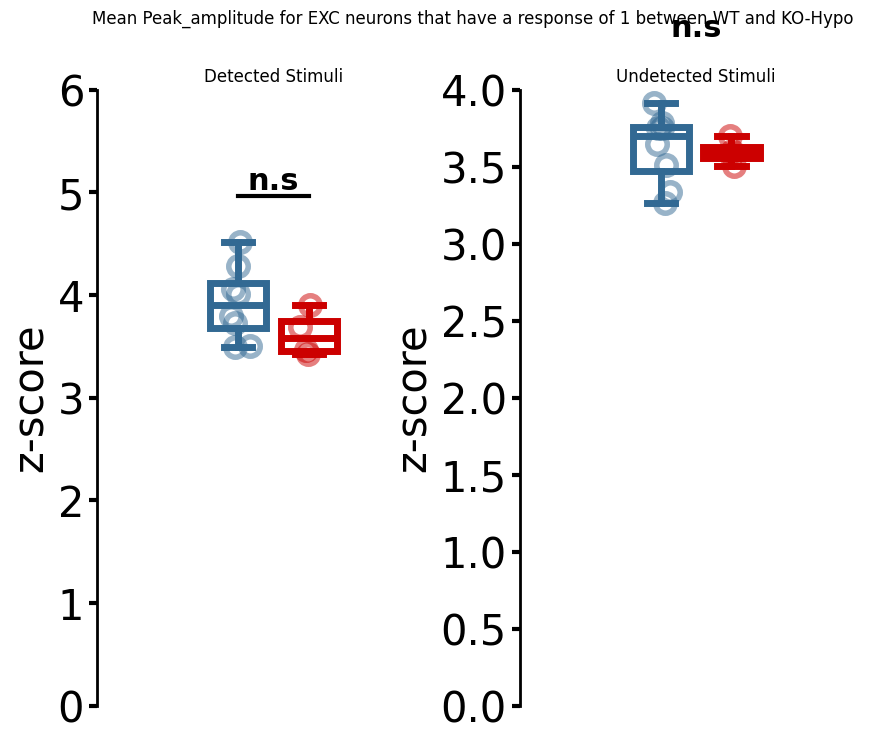

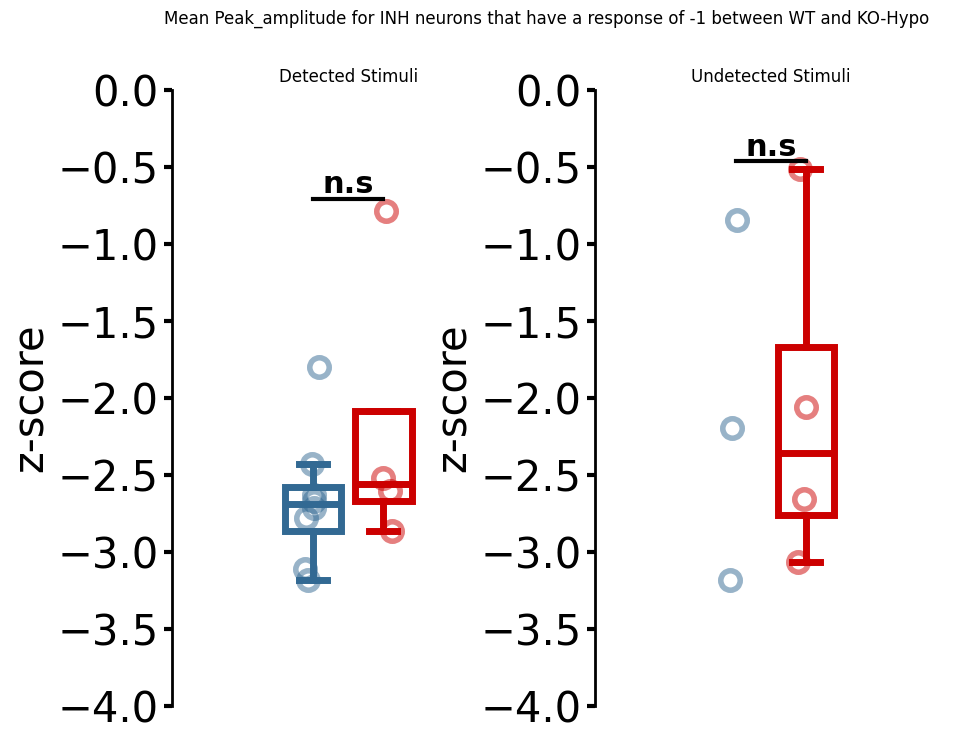

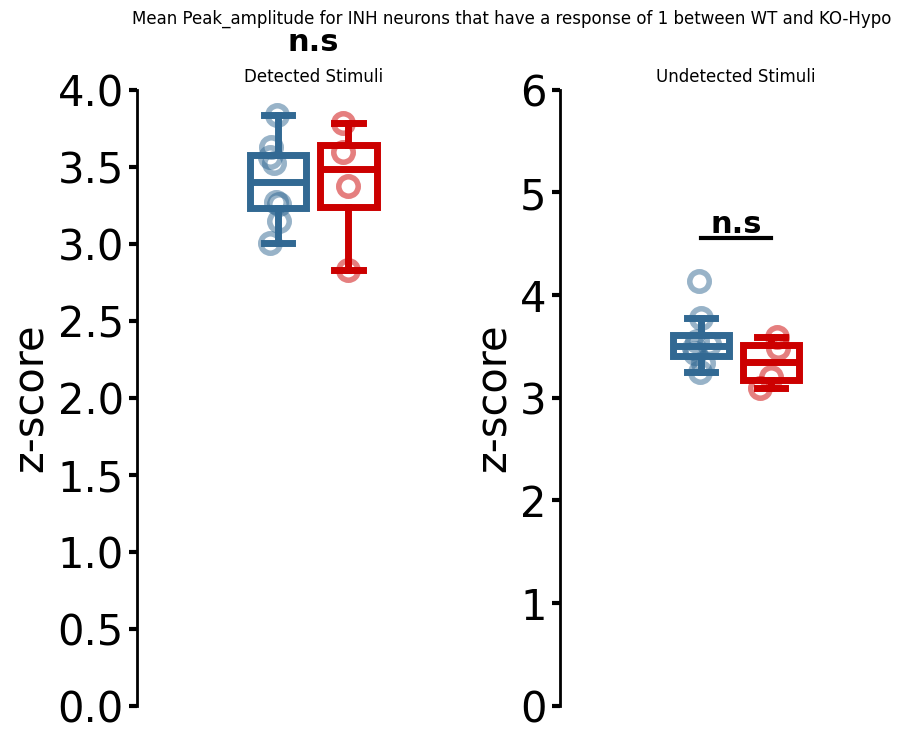

In [37]:
for parameter in ["Peak_delay", "Peak_amplitude"]:
    for neurone_type in ["EXC", "INH"]:
        for response_type in [-1, 1]:
            wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
            for rec in recs.values():
                # For detected stimuli
                resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
                detected = rec.matrices[neurone_type][parameter][:,rec.detected_stim]
                det = np.where(resp_detected == response_type, detected, np.nan)
                
                # For undetected stimuli
                resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
                undetected = rec.matrices[neurone_type][parameter][:,np.invert(rec.detected_stim)]
                undet = np.where(resp_undetected == response_type, undetected, np.nan)
                
                if rec.genotype == "WT":
                    wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                elif rec.genotype == "KO-Hypo":
                    ko_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                
            scale = "Frames" if parameter == "Peak_delay" else "z-score"
            fig, axs = plt.subplots(1,2,figsize=(10,8))
            ppt.boxplot(axs[0], wt_det,ko_det,scale,ylim=[])
            ppt.boxplot(axs[1], wt_undet,ko_undet,scale,ylim=[])
            axs[0].set_title("Detected Stimuli")
            axs[1].set_title("Undetected Stimuli")
            fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} between WT and KO-Hypo")

# For stimulations at threshold amplitude
---

## Difference of mean response peak delay and mean response peak amplitude between WT and (KO + KO-Hypo)

Boxplot plotting.
Frames
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.7707453999421859, pvalue=0.031552475757985435)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
Frames
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9767225344238151, pvalue=0.9449099649338703)
ShapiroResult(statistic=0.9639563024156241, pvalue=0.8496511593621511)
TtestResult(statistic=-0.022576655515849038, pvalue=0.9823590371064814, df=12.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9363196544487828, pvalue=0.5752705394986981)
ShapiroResult(statistic=0.928588231984194, pvalue=0.5692444437904818)
TtestResult(statistic=-1.1826014308921862, pvalue=0.2598694140537458, df=12.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting

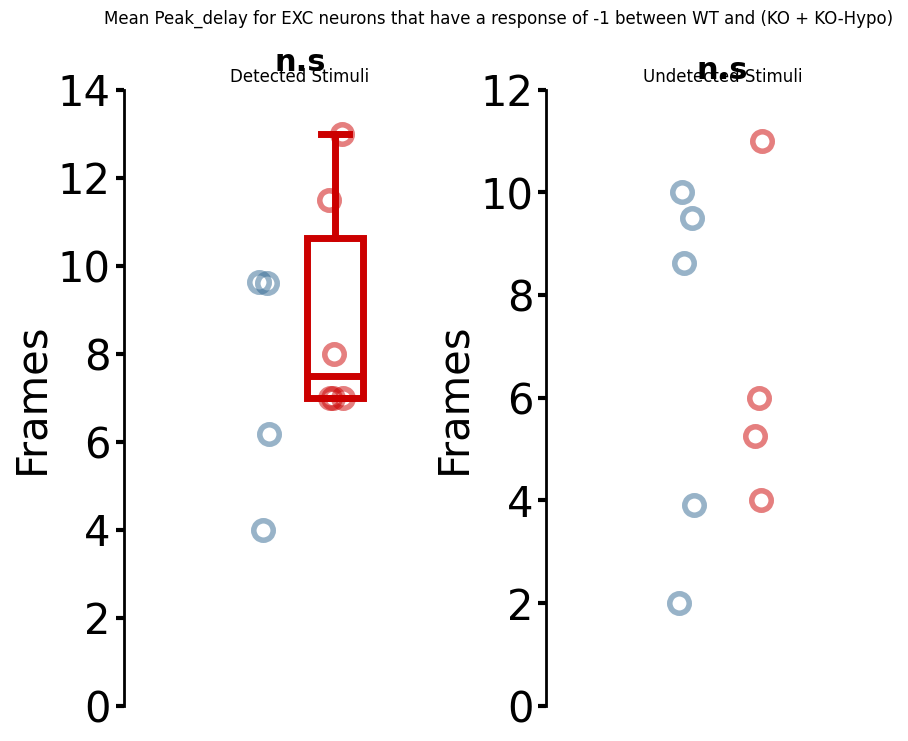

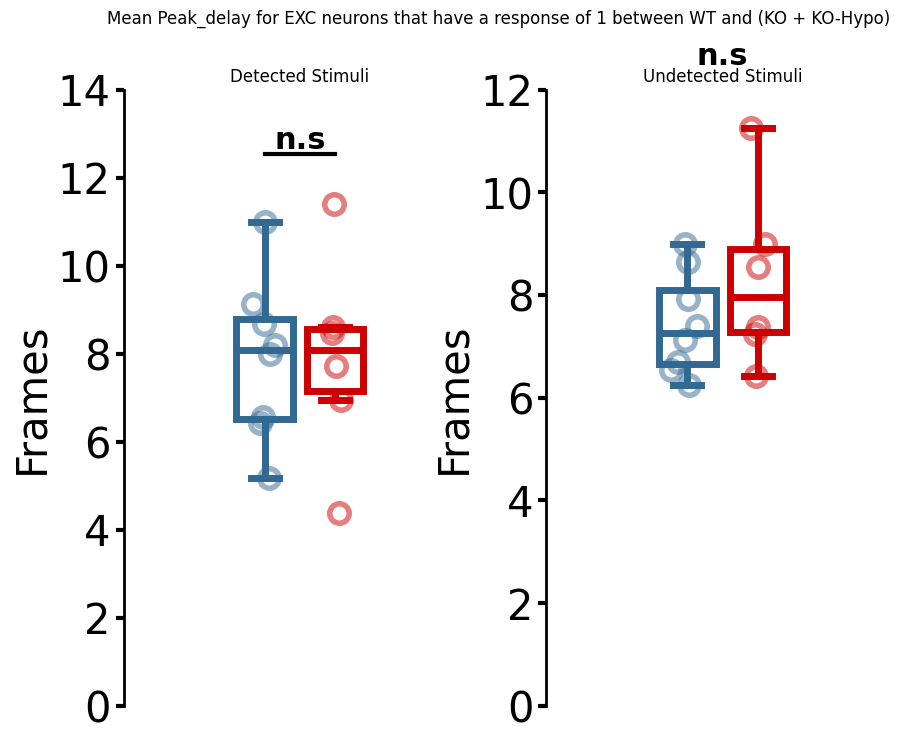

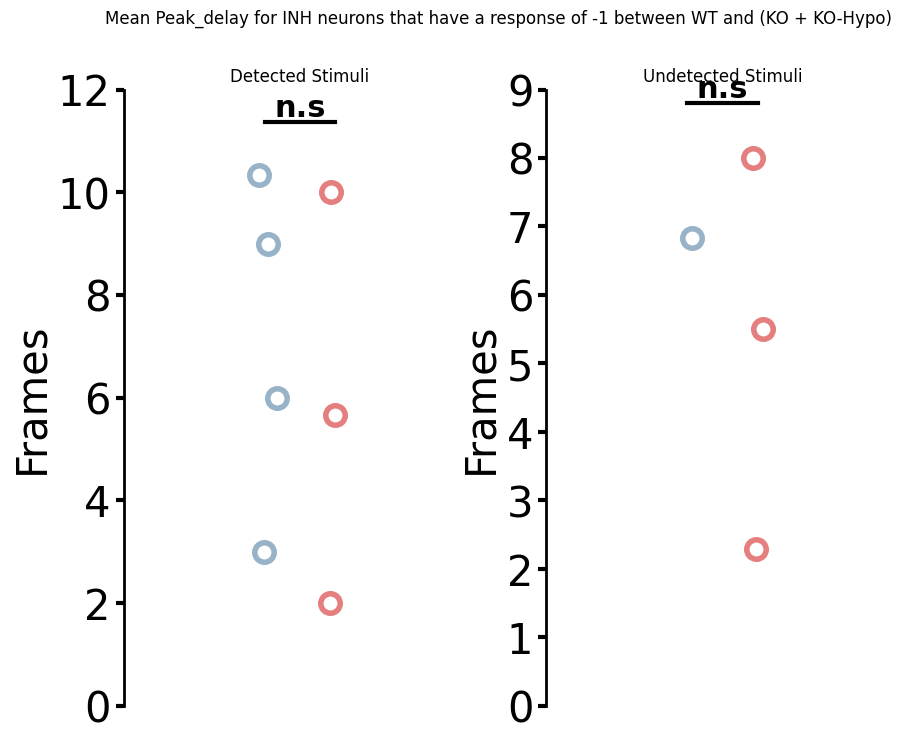

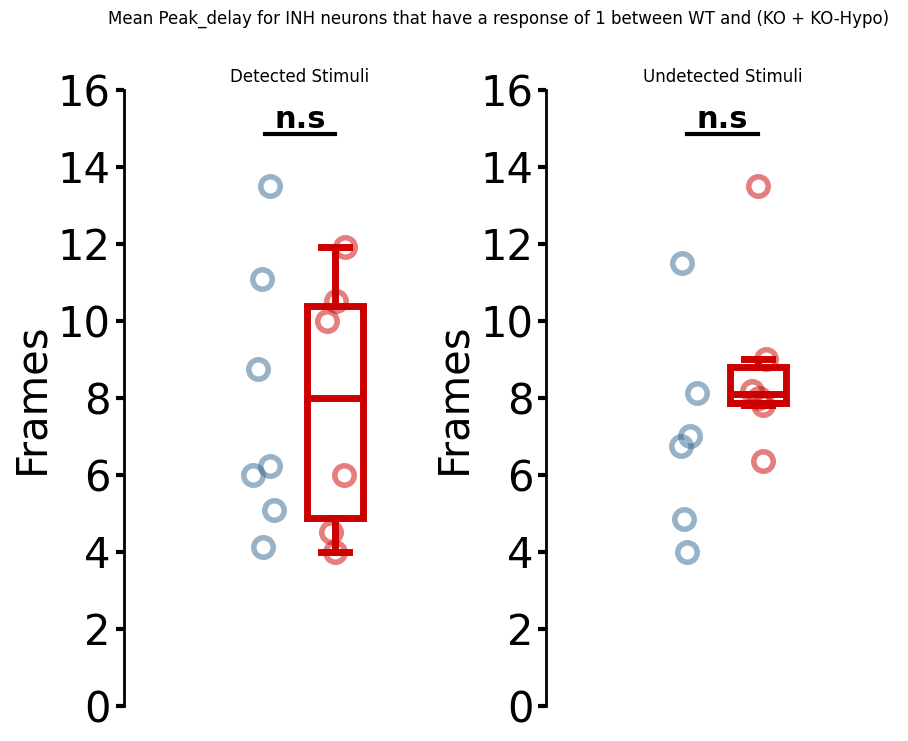

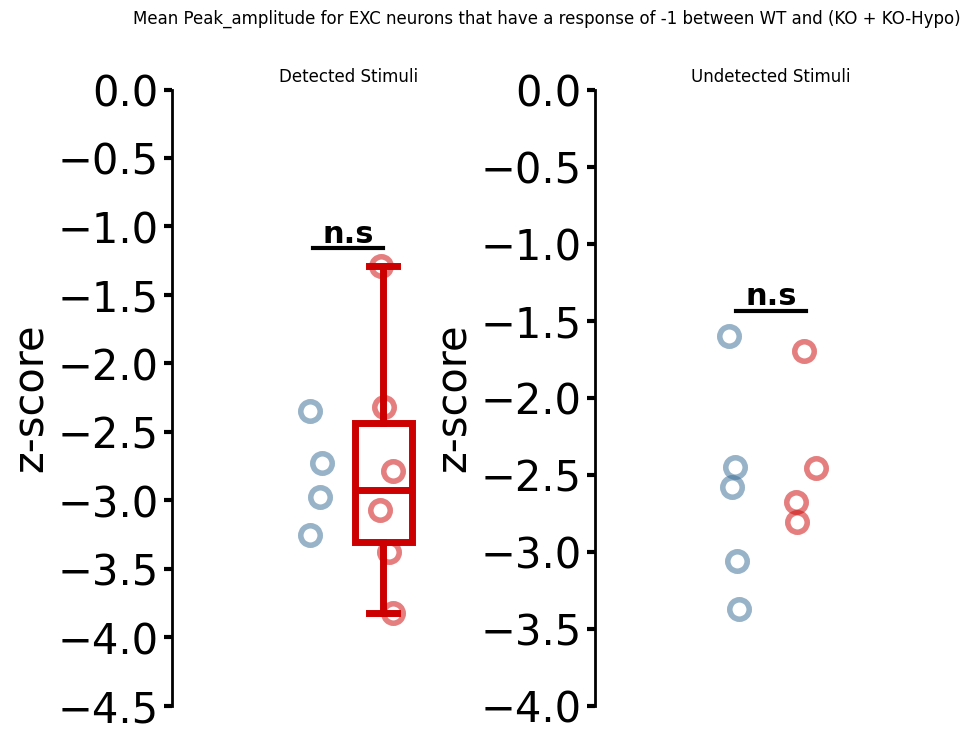

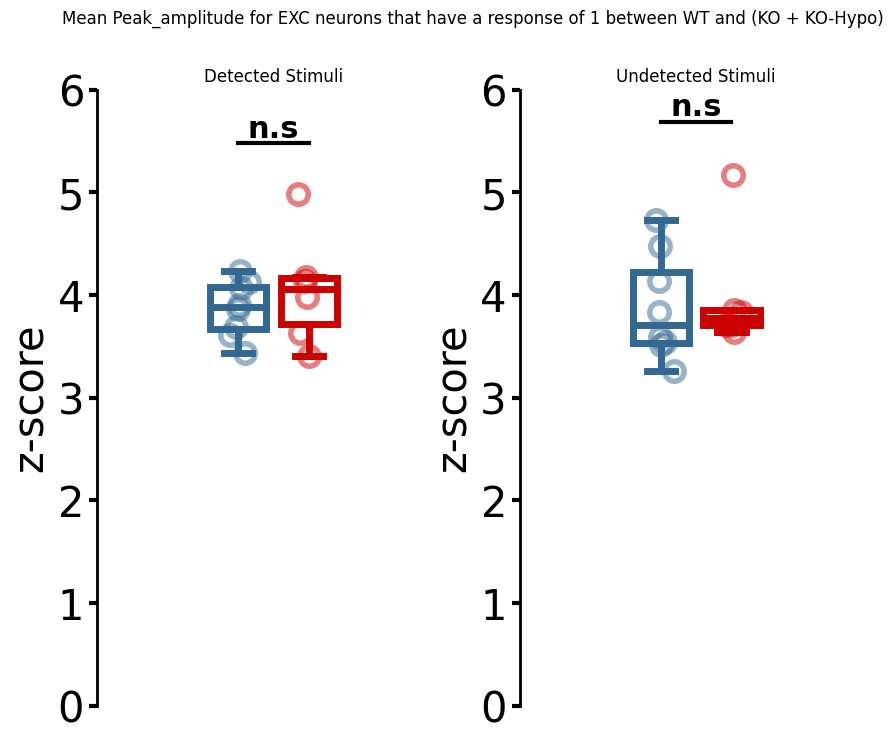

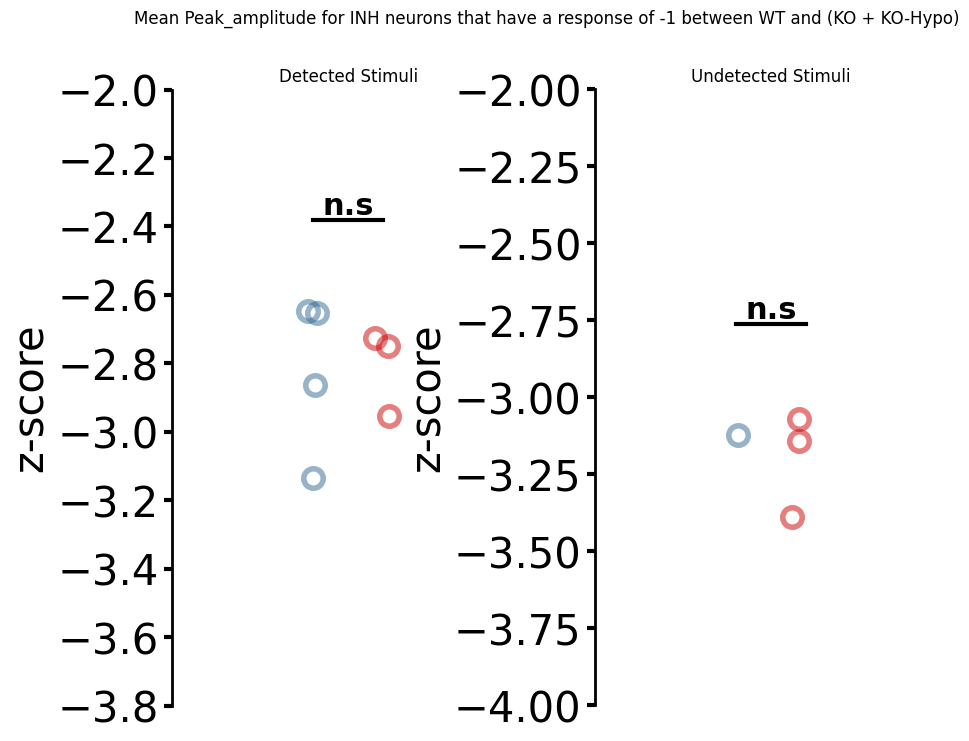

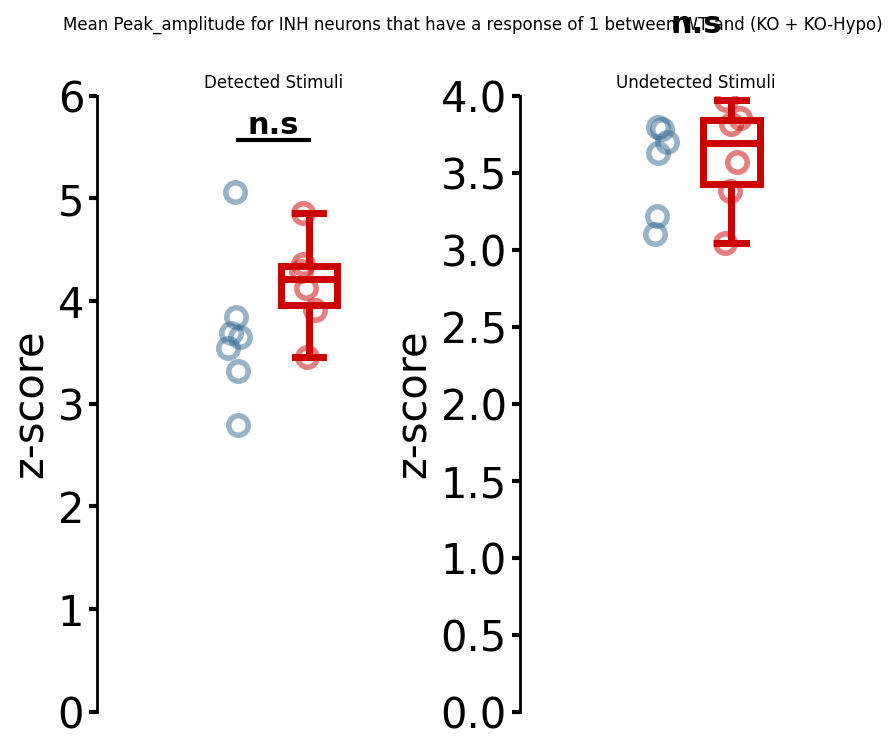

In [38]:
for parameter in ["Peak_delay", "Peak_amplitude"]:
    for neurone_type in ["EXC", "INH"]:
        for response_type in [-1, 1]:
            wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
            for rec in recs.values():
                stim_at_threshold = rec.stim_ampl == rec.threshold
                # For detected stimuli
                stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
                resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
                detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
                det = np.where(resp_detected == response_type, detected, np.nan)
                
                # For undetected stimuli
                stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
                resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
                undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
                undet = np.where(resp_undetected == response_type, undetected, np.nan)
                
                if rec.genotype == "WT":
                    wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                else:
                    ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                    ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                
            scale = "Frames" if parameter == "Peak_delay" else "z-score"
            fig, axs = plt.subplots(1,2,figsize=(10,8))
            ppt.boxplot(axs[0], wt_det,ko_det,scale,ylim=[])
            ppt.boxplot(axs[1], wt_undet,ko_undet,scale,ylim=[])
            axs[0].set_title("Detected Stimuli")
            axs[1].set_title("Undetected Stimuli")
            fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} between WT and (KO + KO-Hypo)")

## Difference of mean response peak delay and mean response peak amplitude between WT and KO-Hypo

Boxplot plotting.
Frames
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.7435730036316399, pvalue=0.03356751609726239)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
Frames
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9767225344238151, pvalue=0.9449099649338703)
ShapiroResult(statistic=0.9089715198076562, pvalue=0.47696990767569475)
TtestResult(statistic=-0.04173729203010927, pvalue=0.9675297092209784, df=10.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=0.9363196544487828, pvalue=0.5752705394986981)
ShapiroResult(statistic=0.8775180144060638, pvalue=0.3281436713884194)
TtestResult(statistic=-1.0073008249350337, pvalue=0.33754174041879625, df=10.0)
Boxplot plotting.
Frames
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=nan, pvalue=nan)
Boxplot plottin

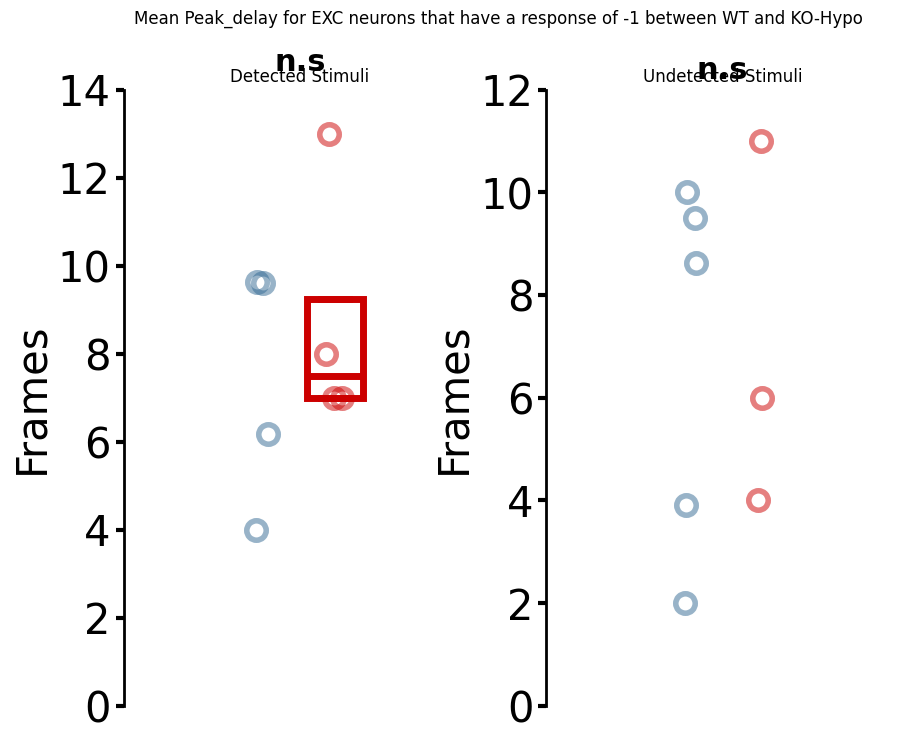

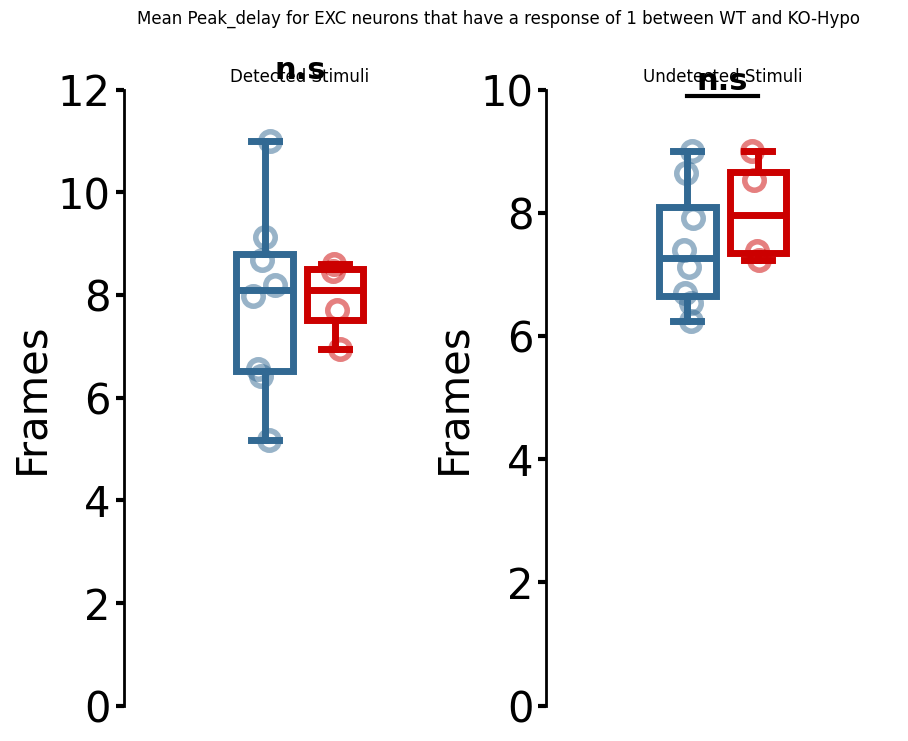

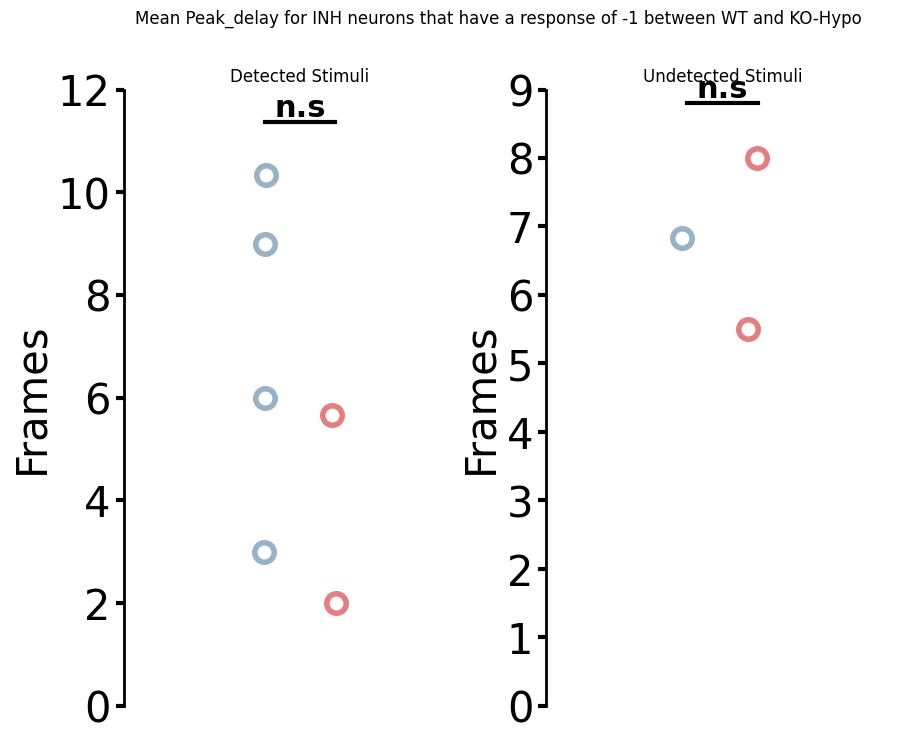

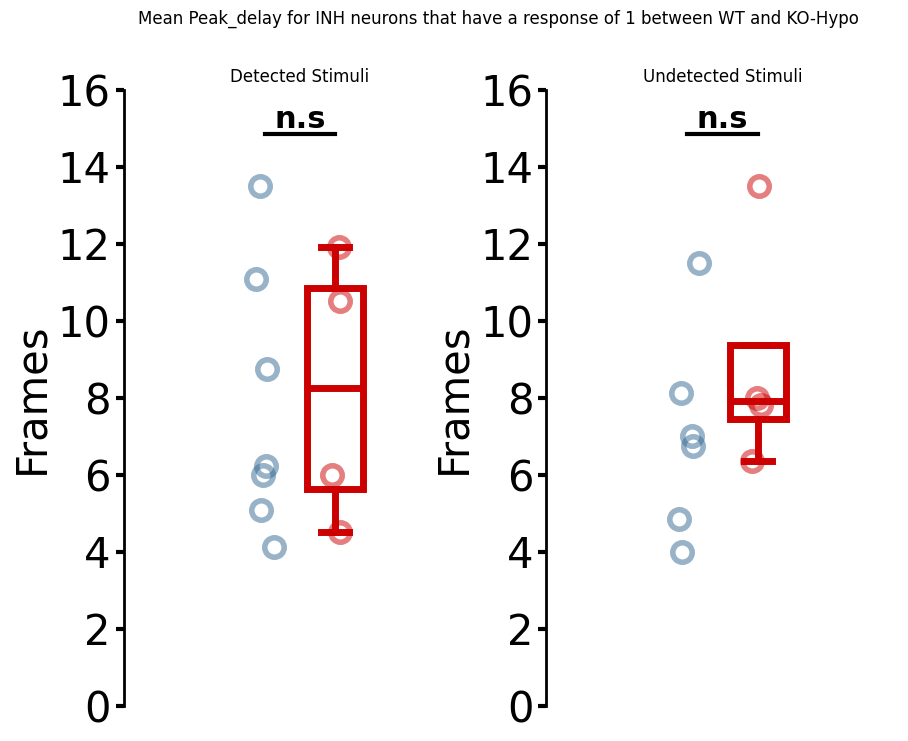

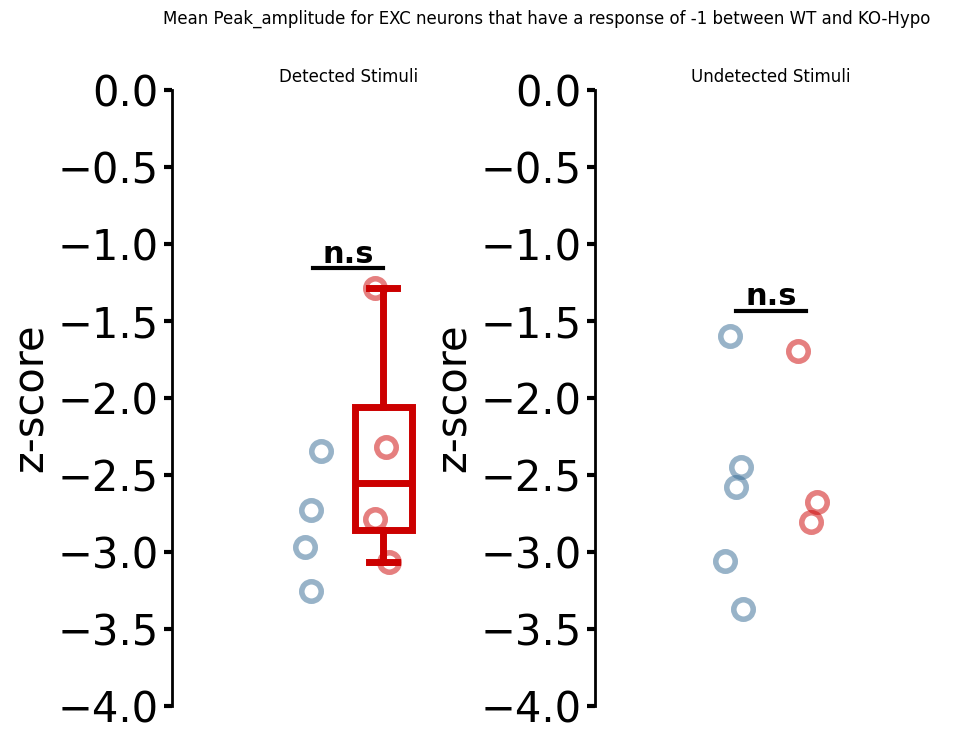

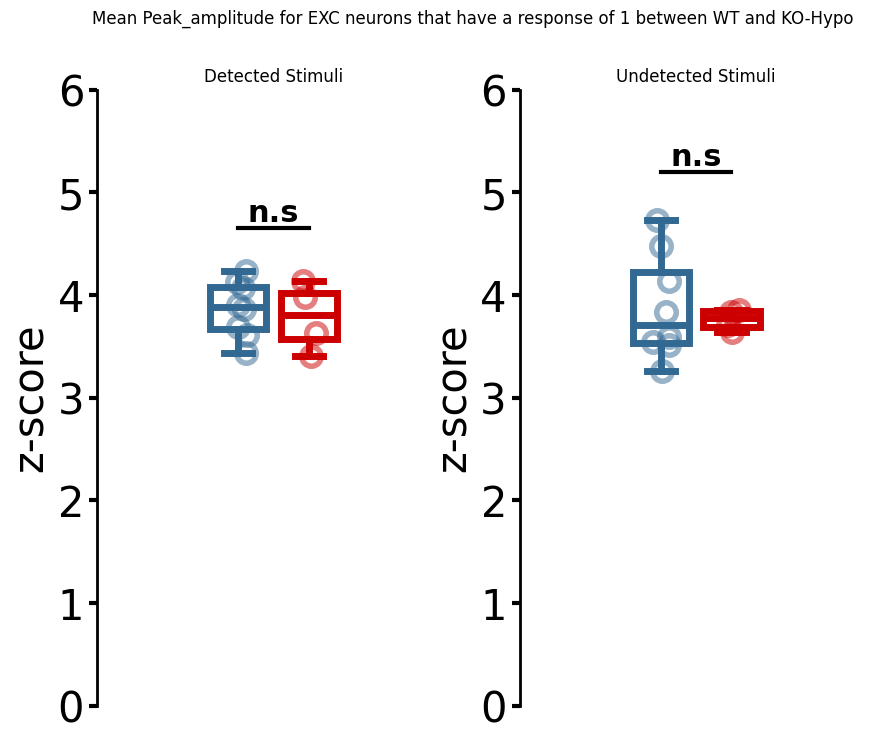

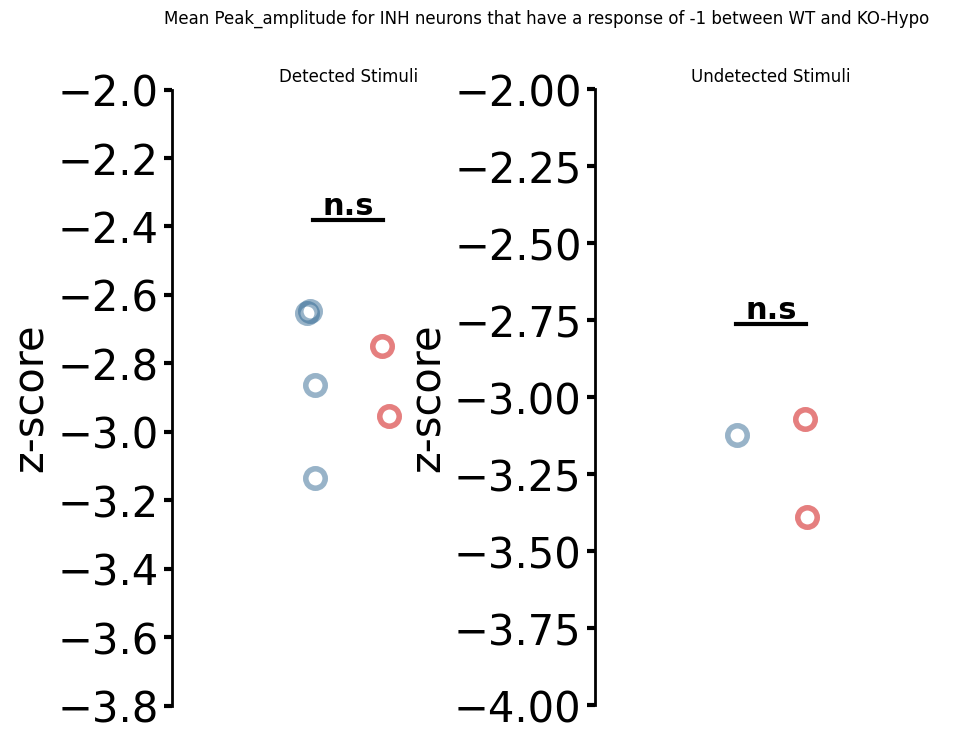

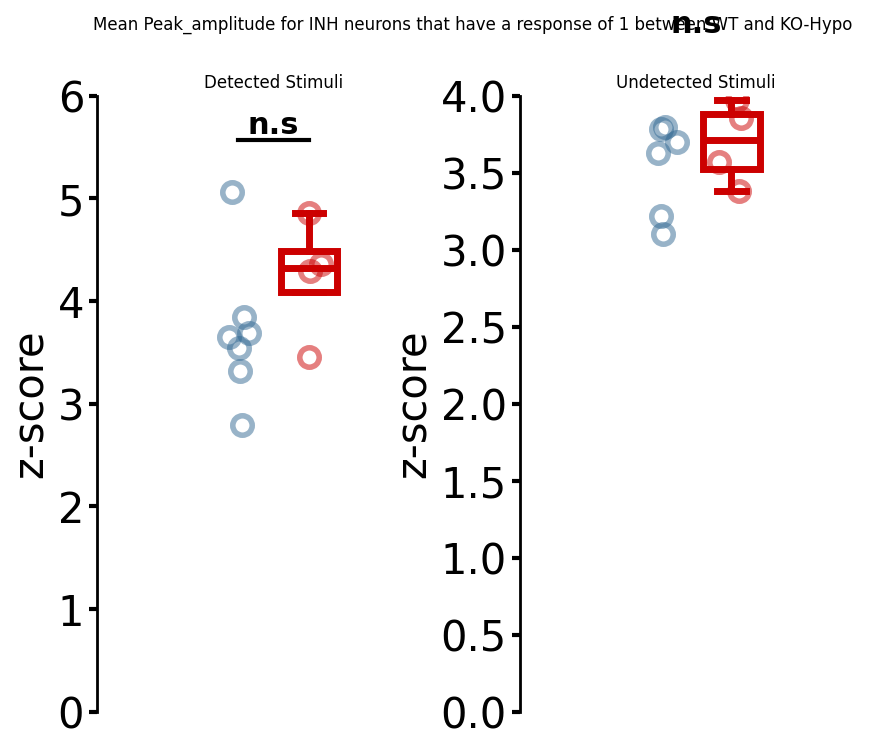

In [39]:
for parameter in ["Peak_delay", "Peak_amplitude"]:
    for neurone_type in ["EXC", "INH"]:
        for response_type in [-1, 1]:
            wt_det, wt_undet, ko_det, ko_undet = [], [], [], []
            for rec in recs.values():
                stim_at_threshold = rec.stim_ampl == rec.threshold
                # For detected stimuli
                stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
                resp_detected = rec.matrices[neurone_type]["Responsivity"][:, stim_thre_det]
                detected = rec.matrices[neurone_type][parameter][:, stim_thre_det]
                det = np.where(resp_detected == response_type, detected, np.nan)

                # For undetected stimuli
                stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
                resp_undetected = rec.matrices[neurone_type]["Responsivity"][:, stim_thre_undet]
                undetected = rec.matrices[neurone_type][parameter][:, stim_thre_undet]
                undet = np.where(resp_undetected == response_type, undetected, np.nan)

                if rec.genotype == "WT":
                    wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                elif rec.genotype == "KO-Hypo":
                    ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                    ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))

            scale = "Frames" if parameter == "Peak_delay" else "z-score"
            fig, axs = plt.subplots(1, 2, figsize=(10, 8))
            ppt.boxplot(axs[0], wt_det, ko_det, scale, ylim=[])
            ppt.boxplot(axs[1], wt_undet, ko_undet, scale, ylim=[])
            axs[0].set_title("Detected Stimuli")
            axs[1].set_title("Undetected Stimuli")
            fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} between WT and KO-Hypo")

## Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (all stimulation amplitudes)

Boxplot plotting.
z-score
ShapiroResult(statistic=0.9507356095464754, pvalue=0.7186474906924085)
ShapiroResult(statistic=0.9259377137238022, pvalue=0.47986401198539963)
TtestResult(statistic=3.570059976730482, pvalue=0.00909619180012446, df=7)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9078387937366994, pvalue=0.42233147732700677)
ShapiroResult(statistic=0.7592623531038769, pvalue=0.02450717924230357)
WilcoxonResult(statistic=10.0, pvalue=1.0)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (all stimulation amplitudes)')

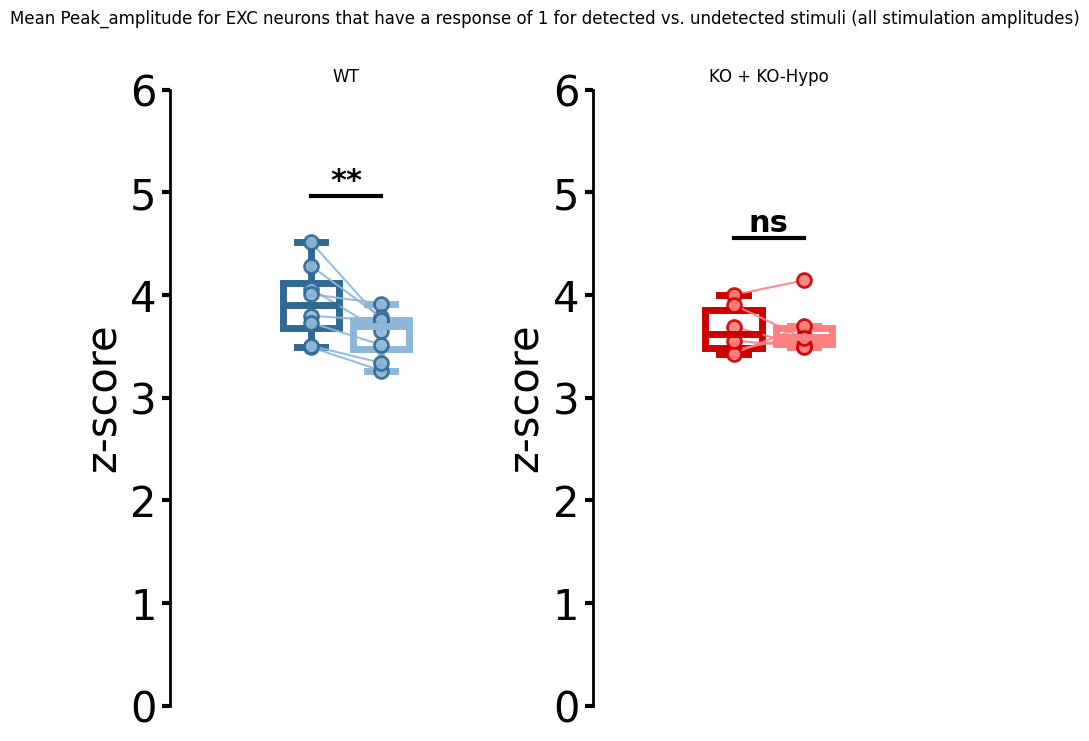

In [40]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1

wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    # For detected stimuli
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
    detected = rec.matrices[neurone_type][parameter][:,rec.detected_stim]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
    undetected = rec.matrices[neurone_type][parameter][:,np.invert(rec.detected_stim)]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    else:
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO + KO-Hypo",ylim=[])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (all stimulation amplitudes)")

Boxplot plotting.
z-score
ShapiroResult(statistic=0.9507356095464754, pvalue=0.7186474906924085)
ShapiroResult(statistic=0.9259377137238022, pvalue=0.47986401198539963)
TtestResult(statistic=3.570059976730482, pvalue=0.00909619180012446, df=7)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9019711194424119, pvalue=0.44091588271134075)
ShapiroResult(statistic=0.9851506318296804, pvalue=0.9314947133735049)
TtestResult(statistic=0.18081456067019872, pvalue=0.8680385917195007, df=3)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (all stimulation amplitudes)')

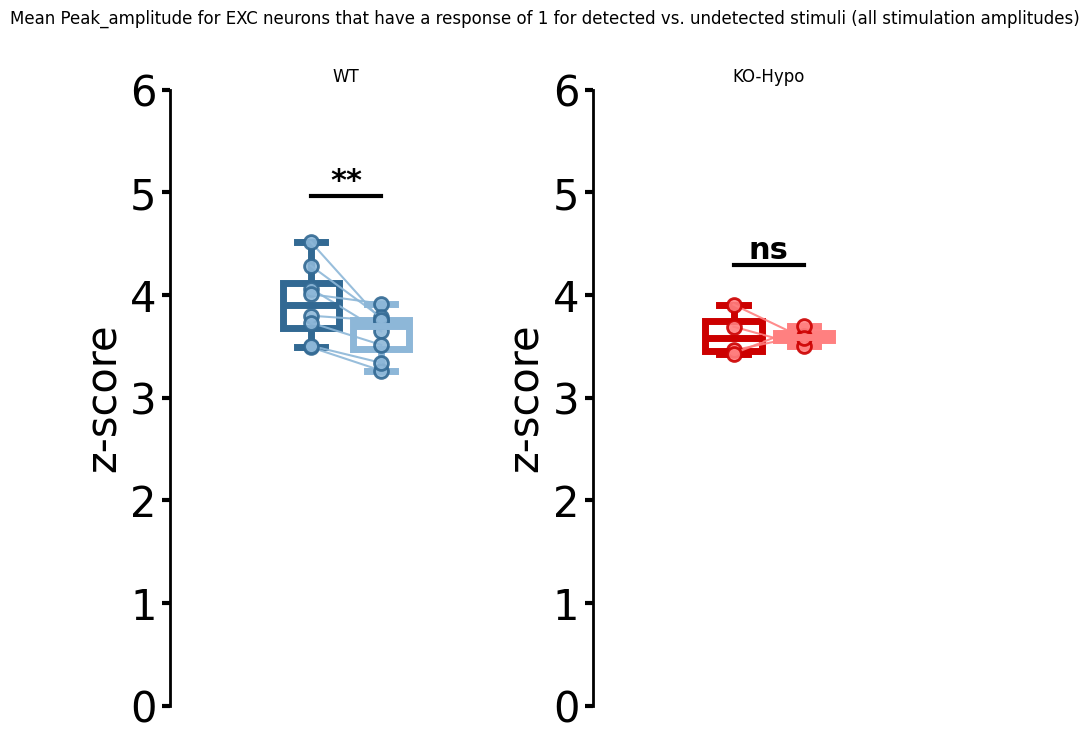

In [47]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1

wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    # For detected stimuli
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
    detected = rec.matrices[neurone_type][parameter][:,rec.detected_stim]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
    undetected = rec.matrices[neurone_type][parameter][:,np.invert(rec.detected_stim)]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    elif rec.genotype == "KO-Hypo":
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[0, 6],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO-Hypo",ylim=[0, 6])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (all stimulation amplitudes)")

## Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulations at threshold amplitude)

Boxplot plotting.
z-score
ShapiroResult(statistic=0.9689544574807486, pvalue=0.8896793234825207)
ShapiroResult(statistic=0.9225283292395435, pvalue=0.4507131683801957)
TtestResult(statistic=-0.1060187463523188, pvalue=0.9185417292294618, df=7)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9361947864459558, pvalue=0.628714048875703)
ShapiroResult(statistic=0.6289157686093008, pvalue=0.0010092513488855995)
WilcoxonResult(statistic=8.0, pvalue=0.6875)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulation at threshold)')

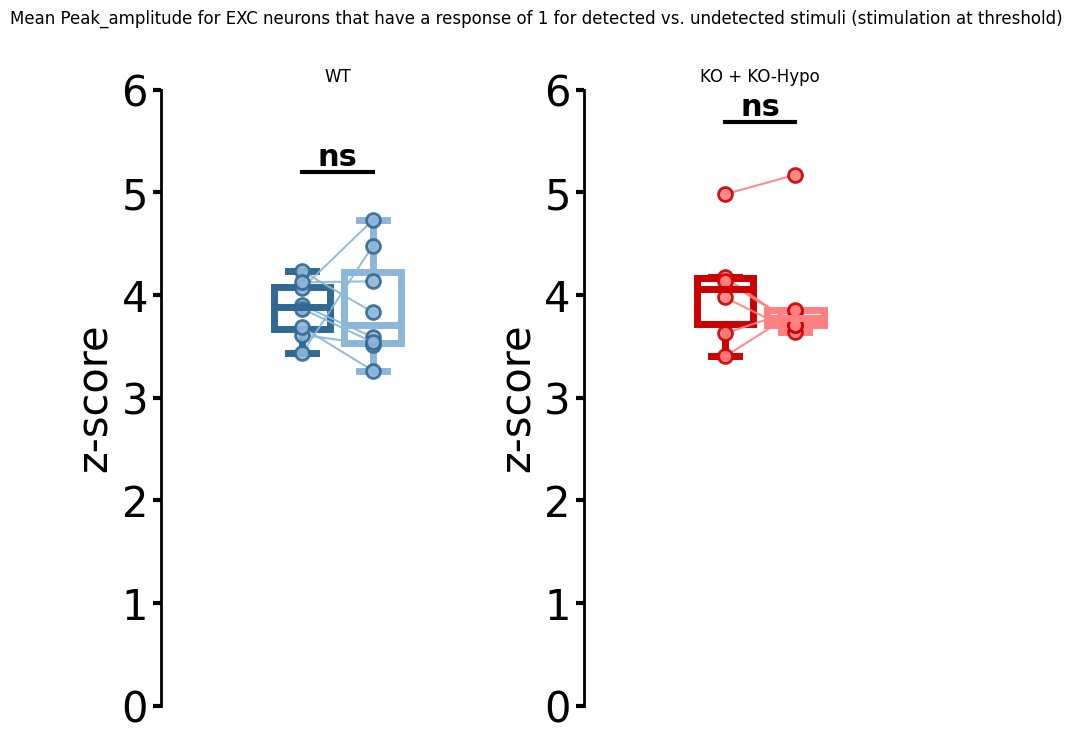

In [41]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1
wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    stim_at_threshold = rec.stim_ampl == rec.threshold
    # For detected stimuli
    stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
    detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
    undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    else:
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO + KO-Hypo",ylim=[])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (stimulation at threshold)")

Boxplot plotting.
z-score
ShapiroResult(statistic=0.9689544574807486, pvalue=0.8896793234825207)
ShapiroResult(statistic=0.9225283292395435, pvalue=0.4507131683801957)
TtestResult(statistic=-0.1060187463523188, pvalue=0.9185417292294618, df=7)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9554729044310744, pvalue=0.7504256471584618)
ShapiroResult(statistic=0.9021018567639678, pvalue=0.44157428297480106)
TtestResult(statistic=0.12055250131799655, pvalue=0.9116661854709611, df=3)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulation at threshold)')

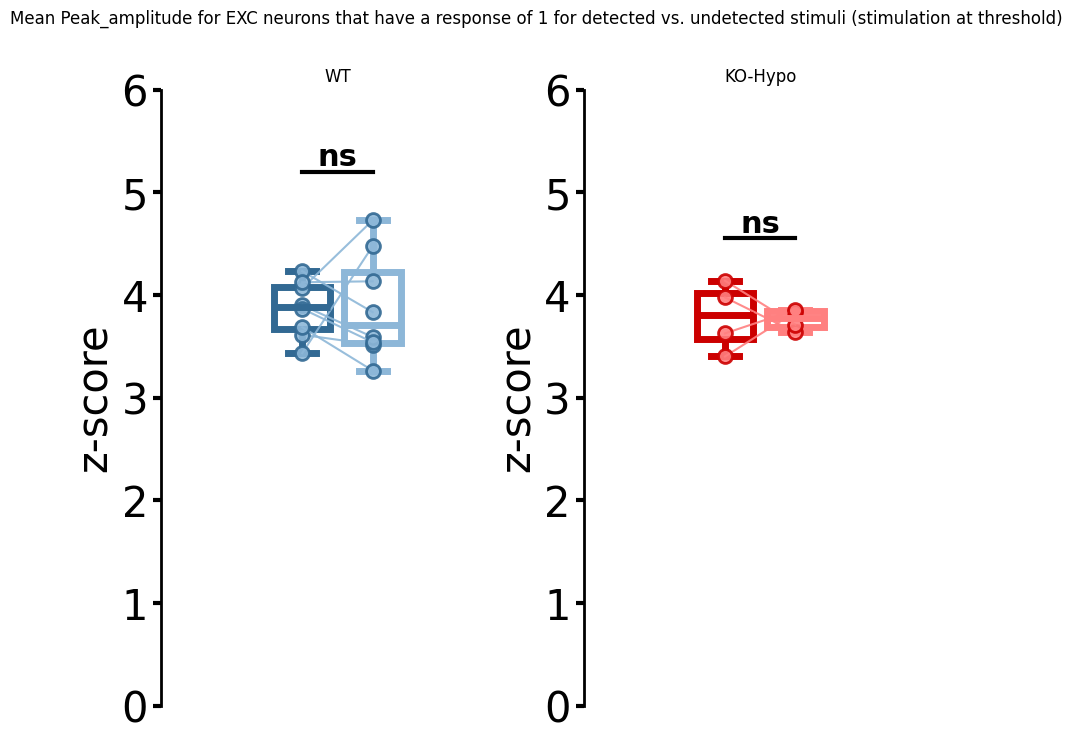

In [48]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1
wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    stim_at_threshold = rec.stim_ampl == rec.threshold
    # For detected stimuli
    stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
    detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
    undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    elif rec.genotype == "KO-Hypo":
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO-Hypo",ylim=[])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (stimulation at threshold)")

## Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulations at 2 and 12)

Boxplot plotting.
z-score
ShapiroResult(statistic=0.6142822442663687, pvalue=0.00023341891143586116)
ShapiroResult(statistic=0.9017159405703038, pvalue=0.29938549959428606)
WilcoxonResult(statistic=11.0, pvalue=0.3828125)
Boxplot plotting.
z-score
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9066658947978463, pvalue=0.33118179970278944)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.938247413097869, pvalue=0.5939227636414218)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for WT stimulation at 2 vs. 12')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


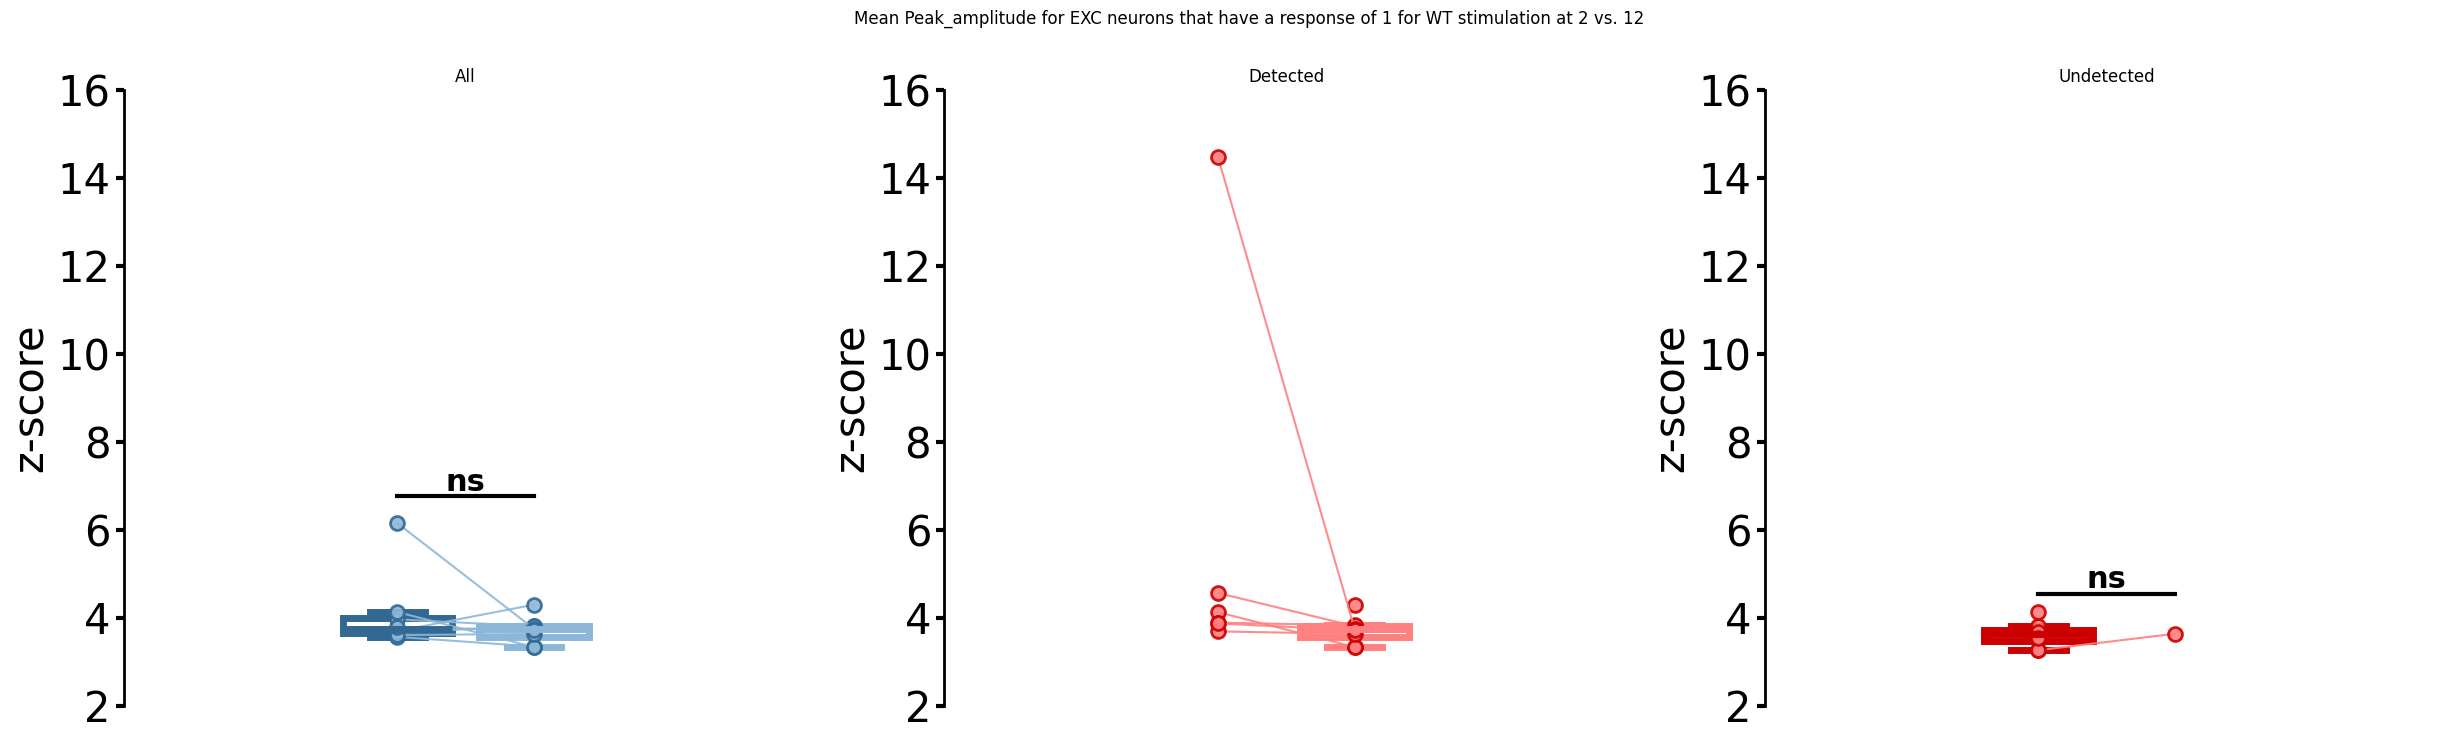

In [42]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1

det_2, undet_2, det_12, undet_12, all_2, all_12 = [],[],[],[],[],[]
for rec in recs.values():
    if rec.genotype == "WT":
        # for amplitude = 2
        stim_2 = rec.stim_ampl == 2
        stim_2_det = np.logical_and(stim_2, rec.detected_stim)
        stim_2_undet = np.logical_and(stim_2, np.invert(rec.detected_stim))
        
        resp_2 = rec.matrices[neurone_type]["Responsivity"][:,stim_2]
        param_2 = rec.matrices[neurone_type][parameter][:,stim_2]
        res_2 = np.where(resp_2 == response_type, param_2, np.nan)
        
        resp_2_det = rec.matrices[neurone_type]["Responsivity"][:,stim_2_det]
        param_2_det = rec.matrices[neurone_type][parameter][:,stim_2_det]
        res_2_det = np.where(resp_2_det == response_type, param_2_det, np.nan)
        
        resp_2_undet = rec.matrices[neurone_type]["Responsivity"][:,stim_2_undet]
        param_2_undet = rec.matrices[neurone_type][parameter][:,stim_2_undet]
        res_2_undet = np.where(resp_2_undet == response_type, param_2_undet, np.nan)
        
        # for amplitude = 12
        stim_12 = rec.stim_ampl == 12
        stim_12_det = np.logical_and(stim_12, rec.detected_stim)
        stim_12_undet = np.logical_and(stim_12, np.invert(rec.detected_stim))
        
        resp_12 = rec.matrices[neurone_type]["Responsivity"][:,stim_12]
        param_12 = rec.matrices[neurone_type][parameter][:,stim_12]
        res_12 = np.where(resp_12 == response_type, param_12, np.nan)
        
        resp_12_det = rec.matrices[neurone_type]["Responsivity"][:,stim_12_det]
        param_12_det = rec.matrices[neurone_type][parameter][:,stim_12_det]
        res_12_det = np.where(resp_12_det == response_type, param_12_det, np.nan)
        
        resp_12_undet = rec.matrices[neurone_type]["Responsivity"][:,stim_12_undet]
        param_12_undet = rec.matrices[neurone_type][parameter][:,stim_12_undet]
        res_12_undet = np.where(resp_12_undet == response_type, param_12_undet, np.nan)
        
        
        all_2.append(np.nanmean(np.nanmean(res_2, axis=1)))
        all_12.append(np.nanmean(np.nanmean(res_12, axis=1)))
        det_2.append(np.nanmean(np.nanmean(res_2_det, axis=1)))
        det_12.append(np.nanmean(np.nanmean(res_12_det, axis=1)))
        undet_2.append(np.nanmean(np.nanmean(res_2_undet, axis=1)))
        undet_12.append(np.nanmean(np.nanmean(res_12_undet, axis=1)))

        
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,3,figsize=(30,8))
ppt.paired_boxplot(axs[0], all_2,all_12,scale, "All", ylim=[3,15],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], det_2,det_12,scale, "Detected",ylim=[3,15])
ppt.paired_boxplot(axs[2], undet_2,undet_12,scale, "Undetected",ylim=[3,15])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for WT stimulation at 2 vs. 12")

## Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulations at threshold + 2 amplitude)

4456
4745
4939
5886
5896
5879
5889
5873
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9716524511904754, pvalue=0.9106506575532116)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
z-score
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulation at threshold + 2)')

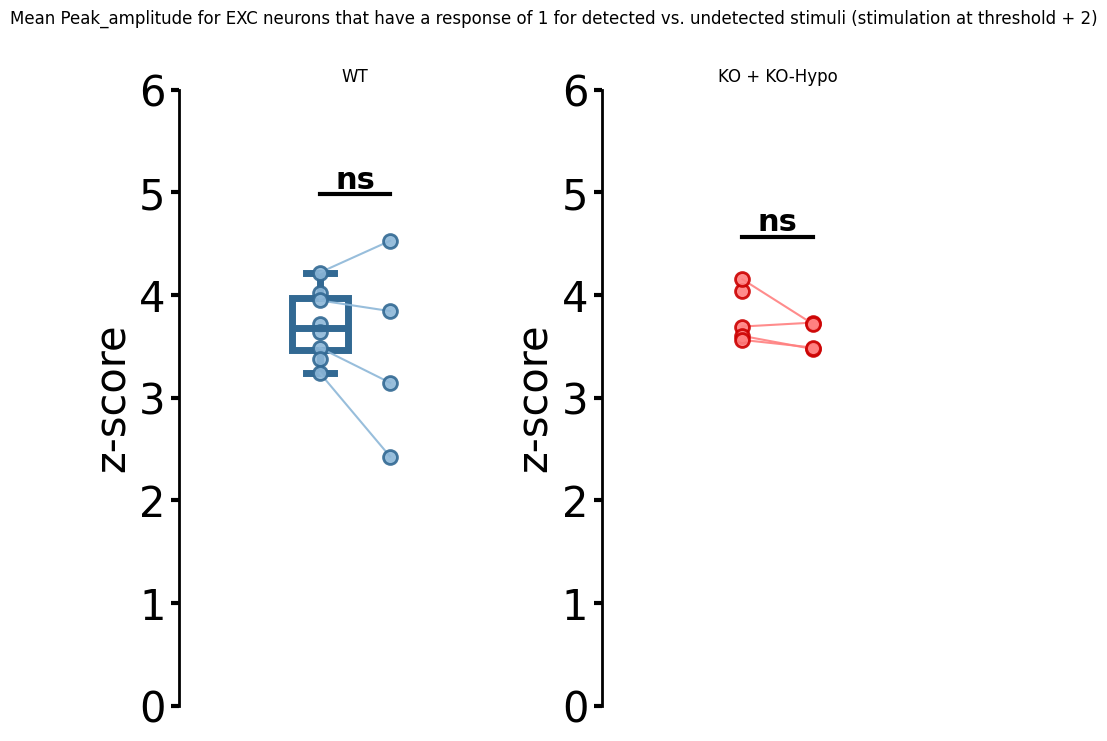

In [44]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1
wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    stim_at_threshold = rec.stim_ampl == rec.threshold + 2
    # For detected stimuli
    stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
    detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
    undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
        print(rec.filename)
    else:
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO + KO-Hypo",ylim=[])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (stimulation at threshold + 2)")

## Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulations at threshold - 2 amplitude)


Boxplot plotting.
z-score
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
z-score
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=0.9339258171556095, pvalue=0.6107416008078904)
WilcoxonResult(statistic=nan, pvalue=nan)


Text(0.5, 0.98, 'Mean Peak_amplitude for EXC neurons that have a response of 1 for detected vs. undetected stimuli (stimulation at threshold - 2)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


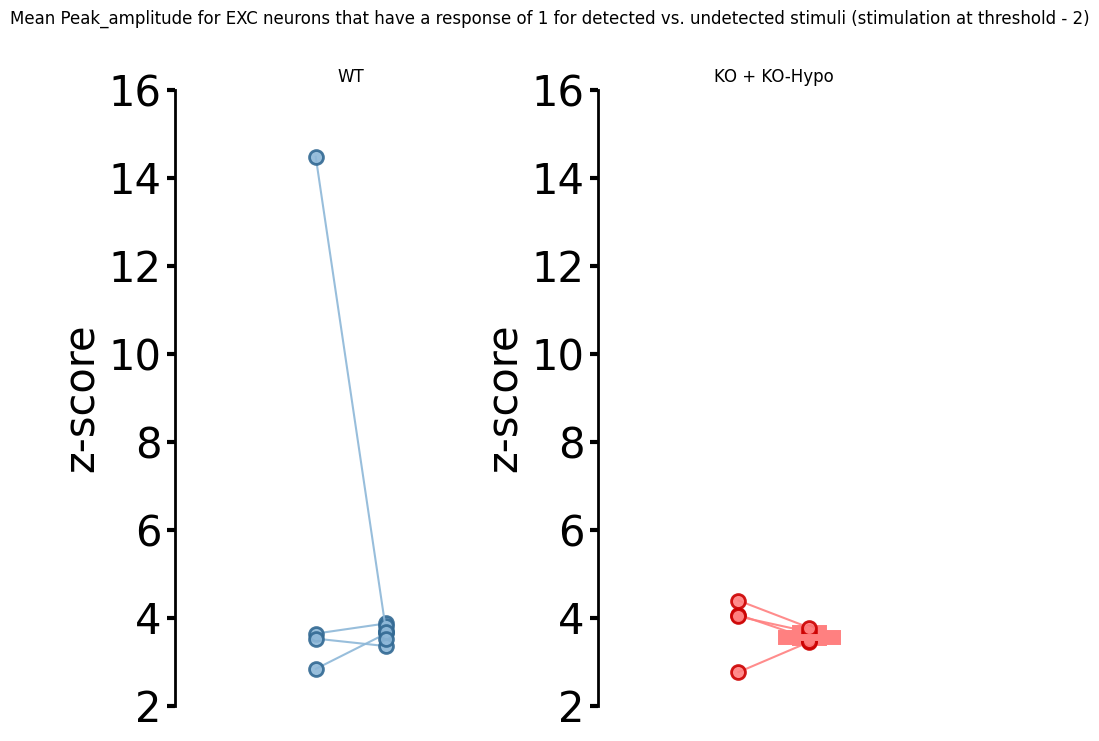

In [45]:
parameter = "Peak_amplitude"
neurone_type = "EXC"
response_type = 1
wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    stim_at_threshold = rec.stim_ampl == rec.threshold - 2
    # For detected stimuli
    stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
    detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
    undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    else:
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[2, 15],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO + KO-Hypo",ylim=[2, 15])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (stimulation at threshold - 2)")

## Mean Peak_amplitude for INH neurons that have a response of 1 for detected vs. undetected stimuli (all stimulation amplitudes)

Boxplot plotting.
z-score
ShapiroResult(statistic=0.966763363516129, pvalue=0.8714704399819644)
ShapiroResult(statistic=0.892065649704536, pvalue=0.24458449187529718)
TtestResult(statistic=-1.6248324017951588, pvalue=0.14822611234646774, df=7)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.8217485382676978, pvalue=0.0913759836891883)
ShapiroResult(statistic=0.8131350297098913, pvalue=0.07689632922264342)
TtestResult(statistic=1.092145224413396, pvalue=0.3245764989009707, df=5)


Text(0.5, 0.98, 'Mean Peak_amplitude for INH neurons that have a response of 1 for detected vs. undetected stimuli (all stimulation amplitudes)')

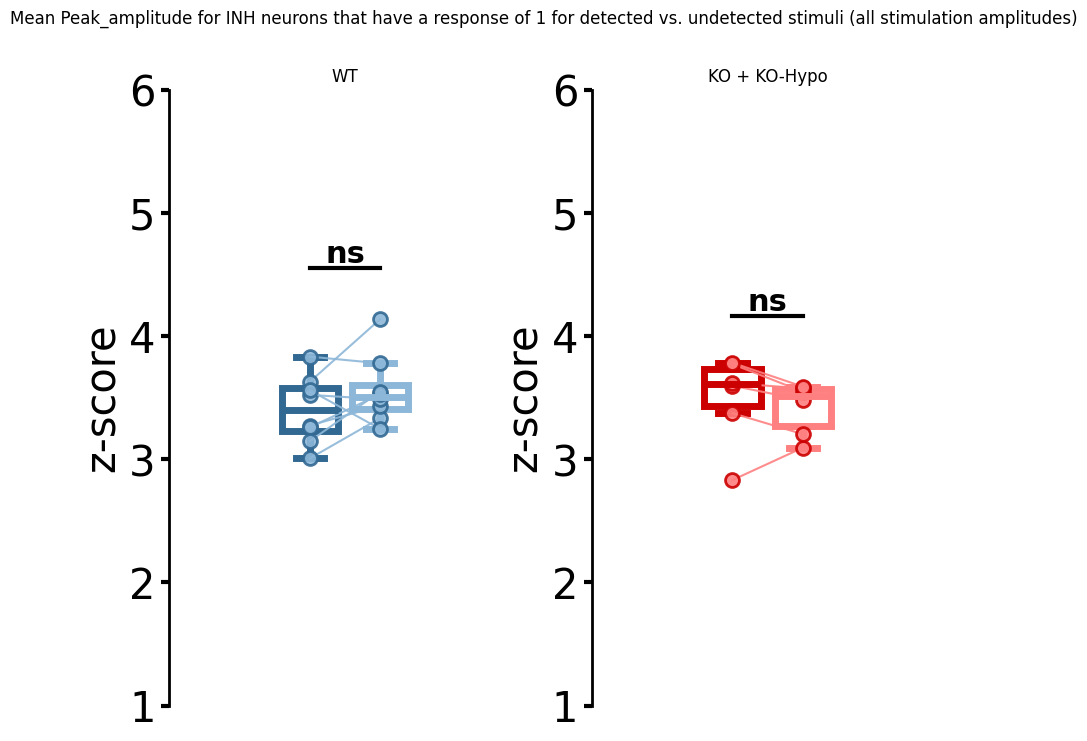

In [54]:
parameter = "Peak_amplitude"
neurone_type = "INH"
response_type = 1

wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    # For detected stimuli
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
    detected = rec.matrices[neurone_type][parameter][:,rec.detected_stim]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
    undetected = rec.matrices[neurone_type][parameter][:,np.invert(rec.detected_stim)]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    else:
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[1,6],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO + KO-Hypo",ylim=[1,6])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (all stimulation amplitudes)")

Boxplot plotting.
z-score
ShapiroResult(statistic=0.966763363516129, pvalue=0.8714704399819644)
ShapiroResult(statistic=0.892065649704536, pvalue=0.24458449187529718)
TtestResult(statistic=-1.6248324017951588, pvalue=0.14822611234646774, df=7)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9373657399934878, pvalue=0.6383307632953321)
ShapiroResult(statistic=0.9268882108408574, pvalue=0.5762327442675657)
TtestResult(statistic=0.5043425717708447, pvalue=0.6487315837487987, df=3)


Text(0.5, 0.98, 'Mean Peak_amplitude for INH neurons that have a response of 1 for detected vs. undetected stimuli (all stimulation amplitudes)')

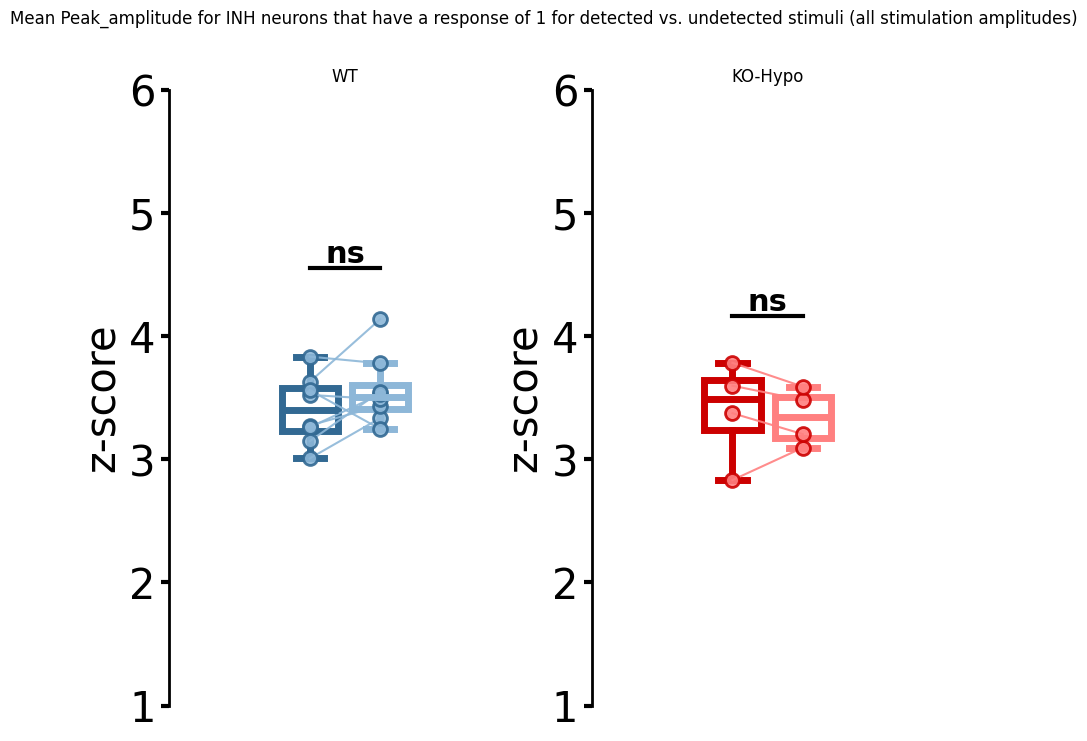

In [51]:
parameter = "Peak_amplitude"
neurone_type = "INH"
response_type = 1

wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    # For detected stimuli
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,rec.detected_stim]
    detected = rec.matrices[neurone_type][parameter][:,rec.detected_stim]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,np.invert(rec.detected_stim)]
    undetected = rec.matrices[neurone_type][parameter][:,np.invert(rec.detected_stim)]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    elif rec.genotype == "KO-Hypo":
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[1,6],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO-Hypo",ylim=[1,6])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (all stimulation amplitudes)")

## Mean Peak_amplitude for INH neurons that have a response of 1 for detected vs. undetected stimuli (stimulations at threshold amplitude)

Boxplot plotting.
z-score
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9841948610729628, pvalue=0.9704093111415542)
ShapiroResult(statistic=0.9288190043858011, pvalue=0.5710129831934273)
TtestResult(statistic=2.348474893432712, pvalue=0.06568450060726223, df=5)


Text(0.5, 0.98, 'Mean Peak_amplitude for INH neurons that have a response of 1 for detected vs. undetected stimuli (stimulation at threshold)')

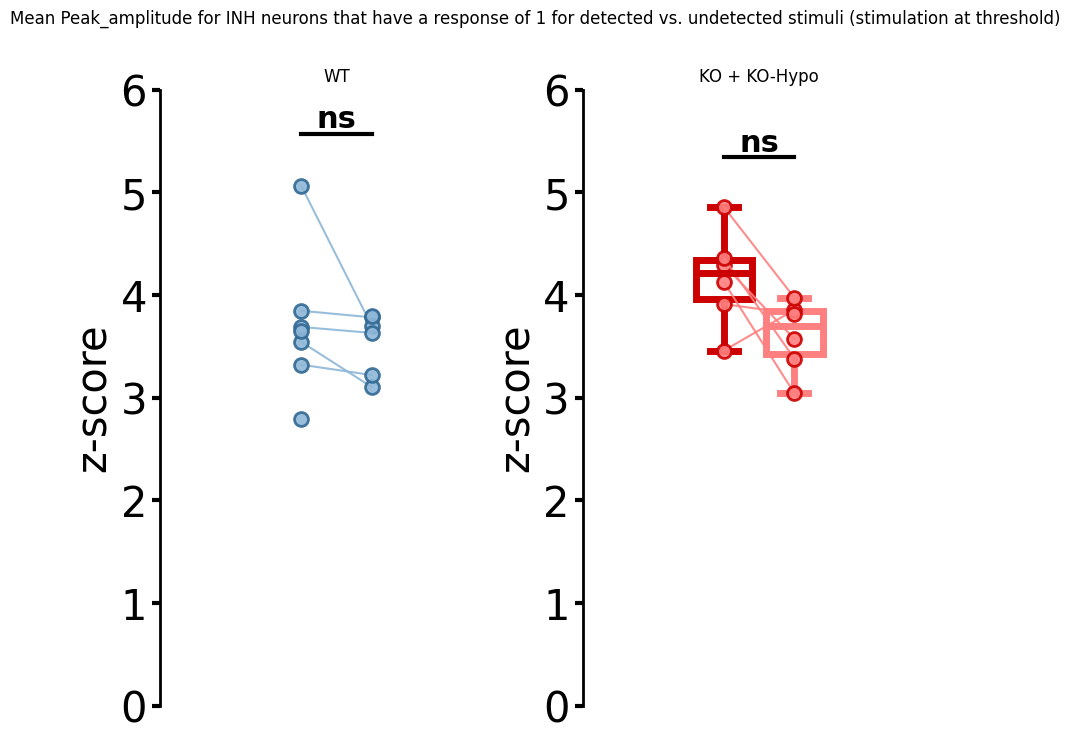

In [52]:
parameter = "Peak_amplitude"
neurone_type = "INH"
response_type = 1
wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    stim_at_threshold = rec.stim_ampl == rec.threshold
    # For detected stimuli
    stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
    detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
    undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    else:
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO + KO-Hypo",ylim=[])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (stimulation at threshold)")

Boxplot plotting.
z-score
ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
WilcoxonResult(statistic=nan, pvalue=nan)
Boxplot plotting.
z-score
ShapiroResult(statistic=0.9368137725037067, pvalue=0.6349968177530122)
ShapiroResult(statistic=0.9519994977368955, pvalue=0.728624333390444)
TtestResult(statistic=1.7168954012390658, pvalue=0.18449983139744458, df=3)


Text(0.5, 0.98, 'Mean Peak_amplitude for INH neurons that have a response of 1 for detected vs. undetected stimuli (stimulation at threshold)')

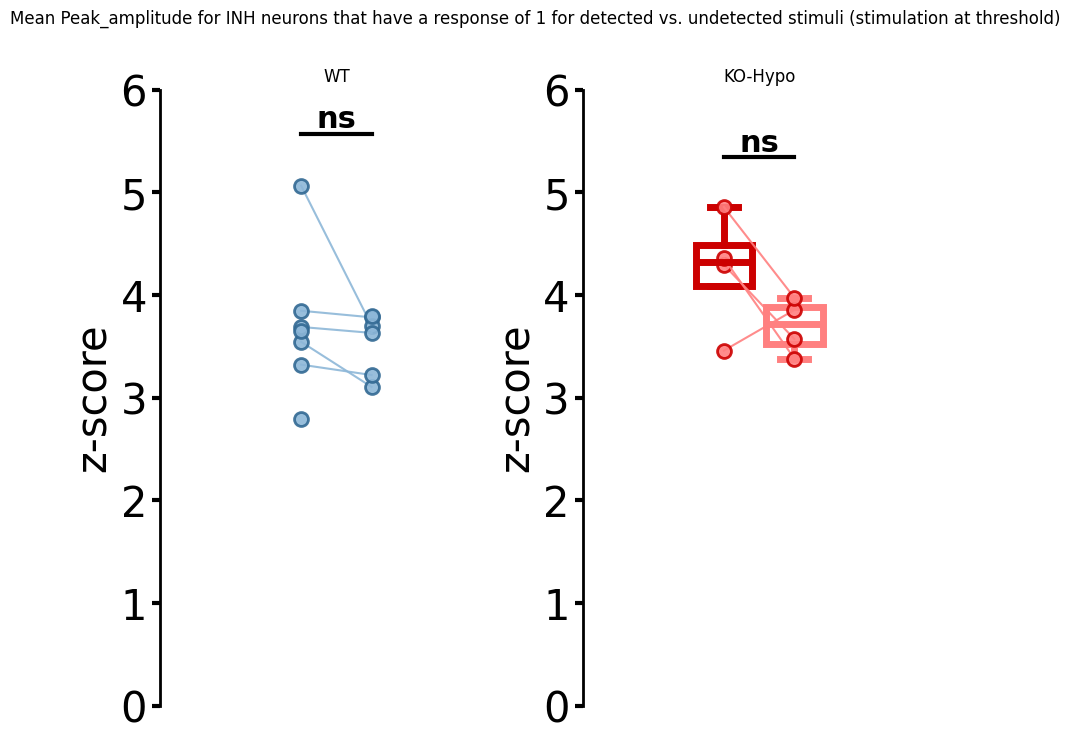

In [53]:
parameter = "Peak_amplitude"
neurone_type = "INH"
response_type = 1
wt_det, wt_undet, ko_det, ko_undet = [],[],[],[]
for rec in recs.values():
    stim_at_threshold = rec.stim_ampl == rec.threshold
    # For detected stimuli
    stim_thre_det = np.logical_and(stim_at_threshold, rec.detected_stim)
    resp_detected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_det]
    detected = rec.matrices[neurone_type][parameter][:,stim_thre_det]
    det = np.where(resp_detected == response_type, detected, np.nan)
    
    # For undetected stimuli
    stim_thre_undet = np.logical_and(stim_at_threshold, np.invert(rec.detected_stim))
    resp_undetected = rec.matrices[neurone_type]["Responsivity"][:,stim_thre_undet]
    undetected = rec.matrices[neurone_type][parameter][:,stim_thre_undet]
    undet = np.where(resp_undetected == response_type, undetected, np.nan)
    
    if rec.genotype == "WT":
        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    elif rec.genotype == "KO-Hypo":
        ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
    
scale = "Frames" if parameter == "Peak_delay" else "z-score"
fig, axs = plt.subplots(1,2,figsize=(10,8))
ppt.paired_boxplot(axs[0], wt_det,wt_undet,scale, "WT", ylim=[],colors=[ppt.wt_color, ppt.light_wt_color])
ppt.paired_boxplot(axs[1], ko_det,ko_undet,scale, "KO-Hypo",ylim=[])
fig.suptitle(f"Mean {parameter} for {neurone_type} neurons that have a response of {response_type} for detected vs. undetected stimuli (stimulation at threshold)")